# Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.         
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [1222]:
#Importing libraries-

In [1223]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1229]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [1230]:
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns  

# Data Cleaning-

In [1231]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The columns like Loan_ID, Gender, Married, Dependents, Education, Self_Employed,Property_Area, Loan_Status contains object data.

In [1232]:
#List of columns-

In [1233]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset has data in the form of integer,object & float type. the memory consumption of data is 62.5 kb.there meight be null values present in the dataset.

# Separating object data columns-

In [1235]:
object=[]

for i in df.columns:
    if df[i].dtype=='object':
        object.append(i)

In [1236]:
object

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# Checking null values-

In [1237]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

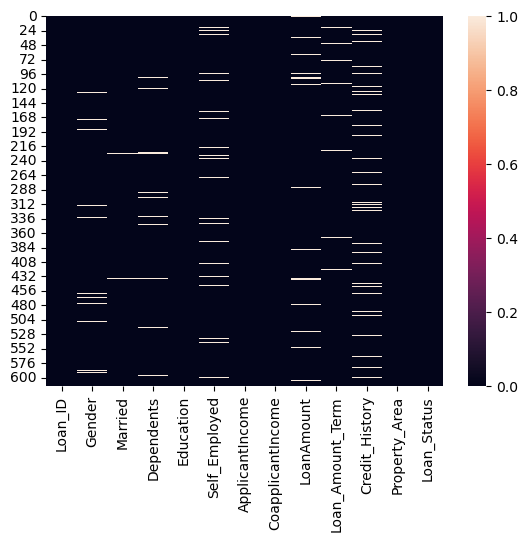

In [1238]:
sns.heatmap(df.isnull())

Here we can see that null values are present in the columns like Gender,dependents,self_employed,loanamount,Loan_Amount_Term,credit_history.

# Removing nan/null values-

Here we will replace/fill nan values with mode in categorical data columns & fill nan values with mean in continous data columns.

In [1239]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [1240]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [1241]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [1242]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [1243]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [1244]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [1245]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [1246]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [1247]:
#Checking again null values-

In [1248]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1249]:
df.isnull().sum().sum()

0

Now we can see all the nan values has been replaced.

In [1250]:
#Checking for duplicate values in the dataset-

In [1251]:
df.duplicated().sum()

0

There are no duplicate values present in the data set.

In [1252]:
df.nunique().to_frame('No of unique values')

,No of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,10


here we can notice loan amount data having 2 type of categories Y & n which means this is a Binary classification problem.

In [1253]:
#Dropping Loan_ID Column-

Here we can see that Loan_ID is a nominal data column which we can drop because it do not have any impact on predicting the labels as nominal data is unique for all the rows.

In [1254]:
df=df.drop(columns=['Loan_ID'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [1255]:
#Lets check the value count of the dataset-

In [1256]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0    

Here we can notice there is a class imbalance in our target variable Loan_Status column.

In [1257]:
#Target variable-

In [1258]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

so it is very much clear now there is class imbalance in the target variable.

# Statistically data exploration-

In [1259]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

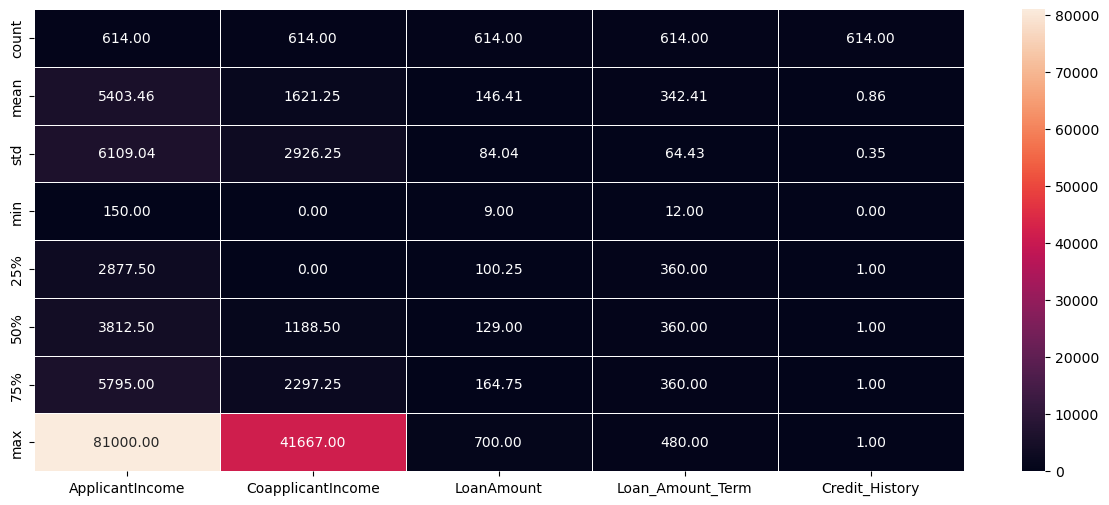

In [1260]:
plt.figure(figsize=(15,6))
sns.heatmap(df.describe(),annot=True,fmt='.2f',linewidth=0.5)

# Observations-

1. The count of all the column values is same which means there are no null values present in the dataset.
2. The mean is greater than the median in the columns like ApplicantIncome,CoapplicantIncome,LoanAmount which means data may be right skewed in this columns.
3. The median is greater than mean in columns like Loan_Amount_Term & Credit_History which means data is left skewed in these columns.
4. There is huge gap bw 75% & max value in the columns like ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term which means there may be outliers present in the dataset.
5. Very high amount of outliers present in applicantincome column as there is very high gap in 75% and max value in this column.

# Exploratory data analysis-

# Univariate analysis-

<AxesSubplot:xlabel='Gender', ylabel='count'>

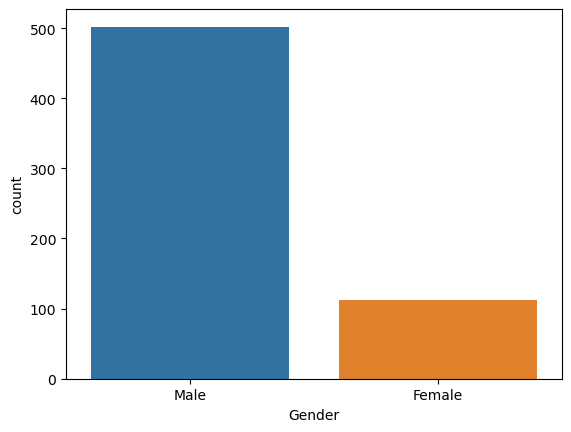

In [550]:
sns.countplot(df['Gender'])

In the dataset number of male applicants are much more than females. its the males who used to apply for loans very often.

<AxesSubplot:xlabel='Married', ylabel='count'>

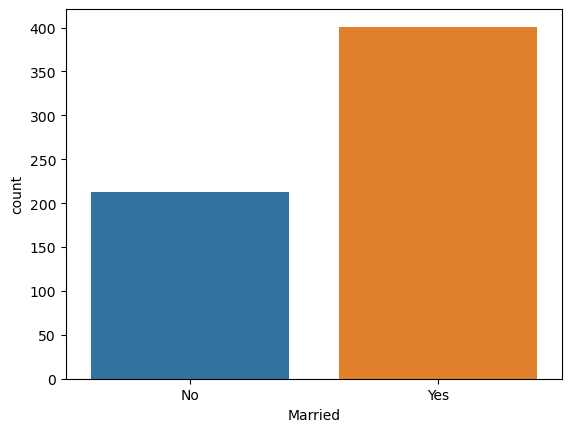

In [551]:
sns.countplot(df['Married'])

In the dataset number of married applicants are much more. its the married people who used to apply for loans very often.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

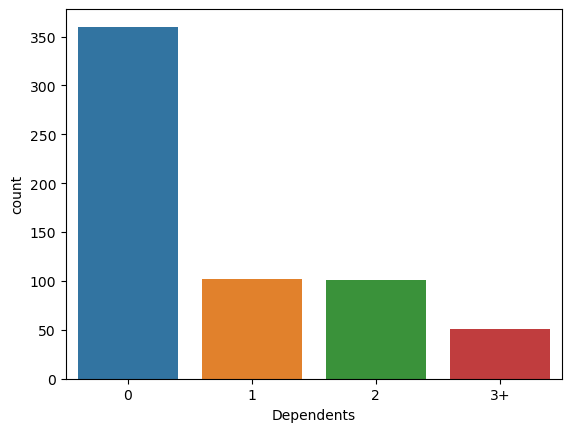

In [552]:
sns.countplot(df['Dependents'])

Applicants with 0 dependents are much more in numbers than the applicants with dependents.

<AxesSubplot:xlabel='Education', ylabel='count'>

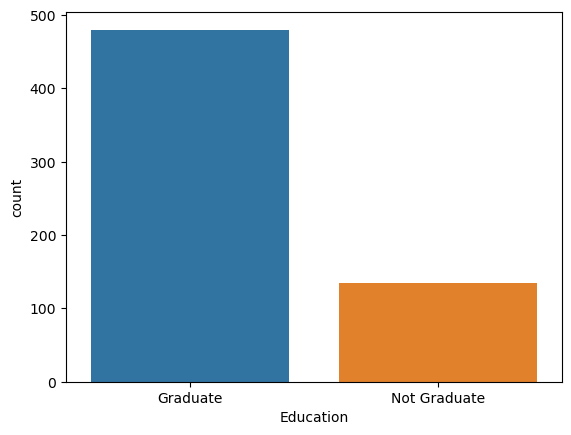

In [553]:
sns.countplot(df['Education'])

Graduate applicants are much more in numbers than the non graduate applicants.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

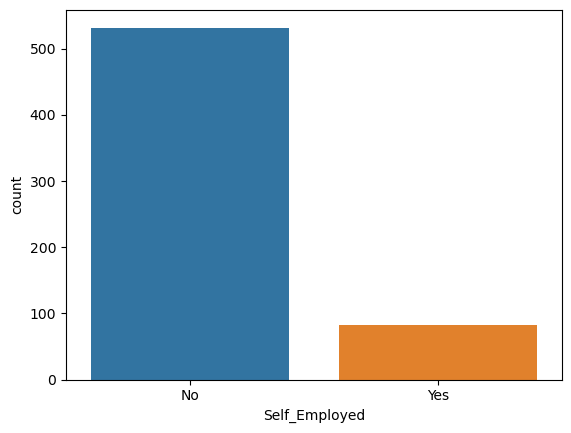

In [554]:
sns.countplot(df['Self_Employed'])

Applicants who are not self employed are higher in numbers.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

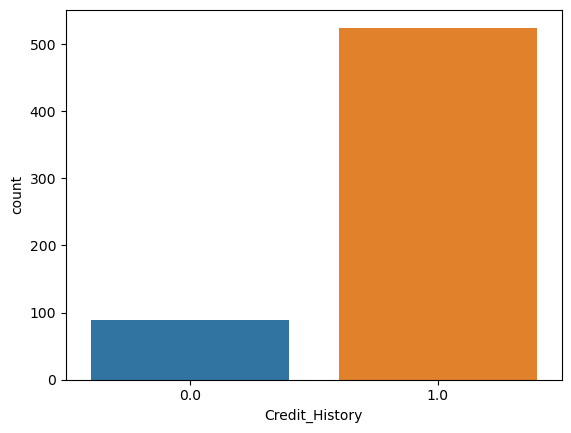

In [555]:
sns.countplot(df['Credit_History'])

Applicants with the ability of repaying debts are high in numbers.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

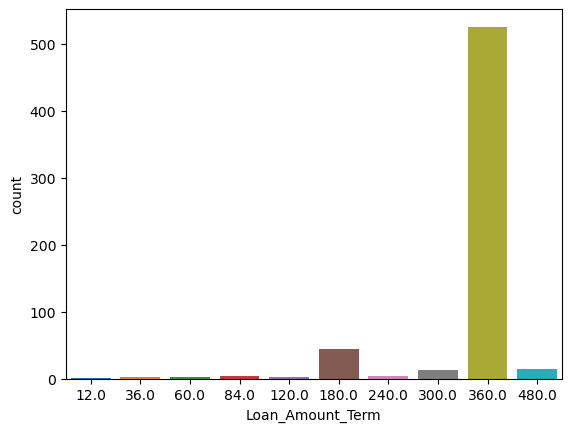

In [556]:
sns.countplot(df['Loan_Amount_Term'])

Applicants with loan amount term of 1 year are high in number than the other applicants with different loan amount terms.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

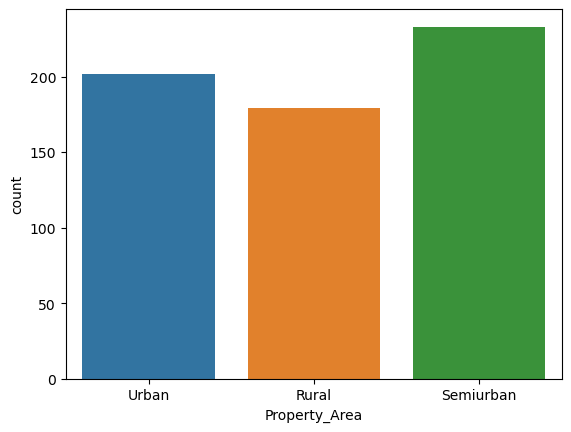

In [557]:
sns.countplot(df['Property_Area'])

Applicants from semiurban area are higher in numbers than the applicants from other areas.

<AxesSubplot:xlabel='ApplicantIncome'>

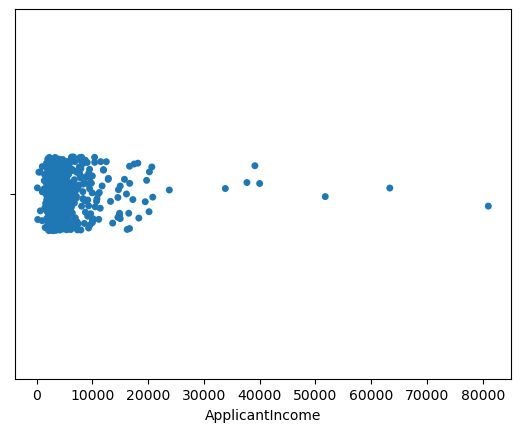

In [558]:
sns.stripplot(df['ApplicantIncome'])

Applicants mostly having the income bw 0 to 20,000 & very less applicants have income above 20,000.

<AxesSubplot:xlabel='CoapplicantIncome'>

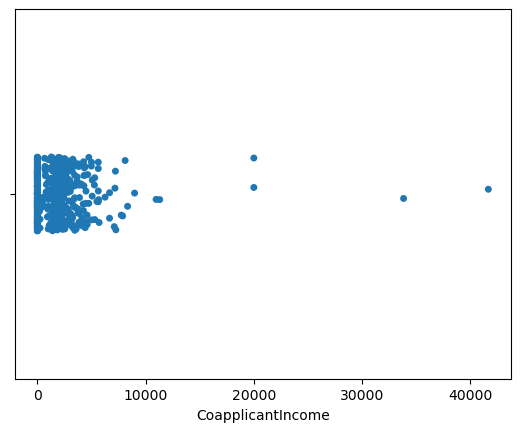

In [559]:
sns.stripplot(df['CoapplicantIncome'])

Mostly The coapplicant income is in the range of 0 to 8000. very less coapplicants having income more than 10,000.

<AxesSubplot:xlabel='LoanAmount'>

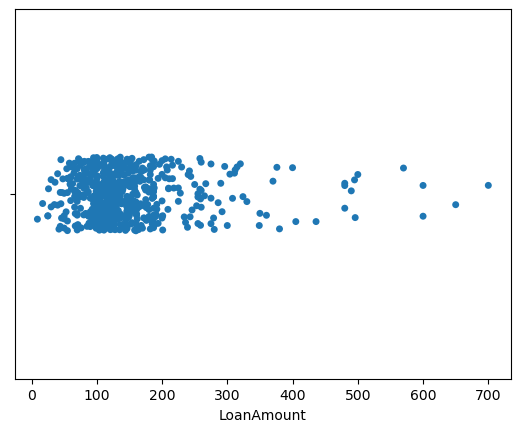

In [560]:
sns.stripplot(df['LoanAmount'])

Mostly The loan amount of applicants is in the range of 0 to 350. very less applicants have loan amount above 350.

# Bivariate analysis-

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

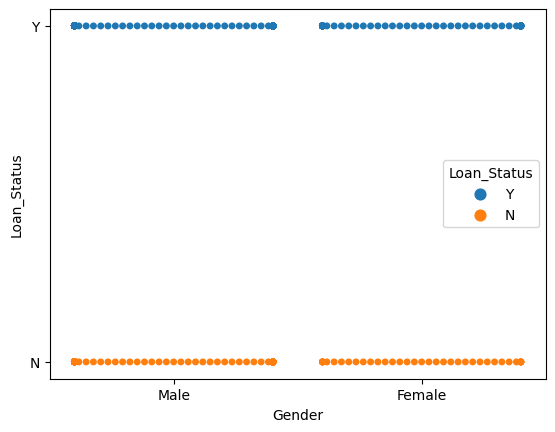

In [561]:
sns.swarmplot(x='Gender',y='Loan_Status',data=df,hue='Loan_Status')

there is no specific pattern in bw gender & loan status.

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

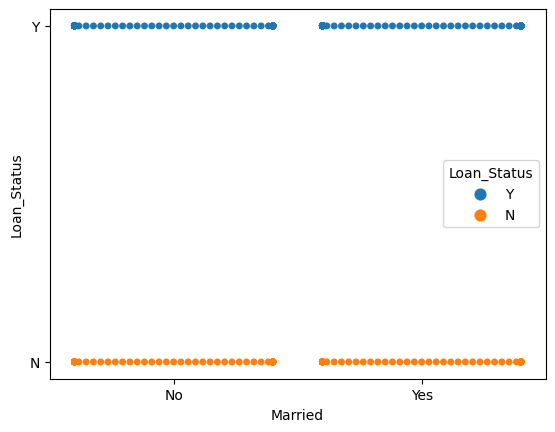

In [562]:
sns.swarmplot(x='Married',y='Loan_Status',data=df,hue='Loan_Status')

there is no specific pattern in bw married & loan status.

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

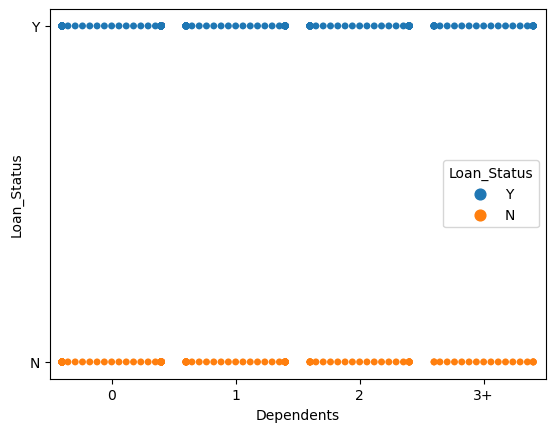

In [563]:
sns.swarmplot(x='Dependents',y='Loan_Status',data=df,hue='Loan_Status')

there is no specific pattern in bw loan status & dependents.

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

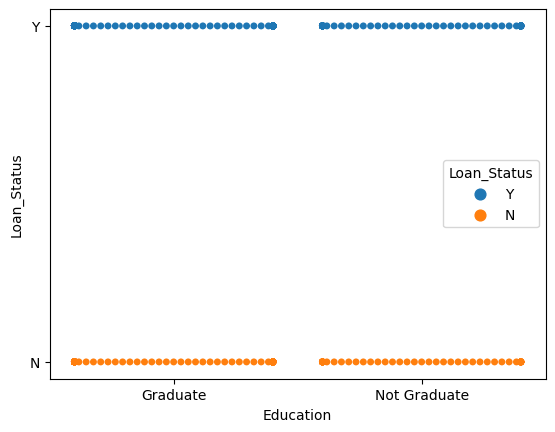

In [564]:
sns.swarmplot(x='Education',y='Loan_Status',data=df,hue='Loan_Status')

There is no specific pattern in bw loan_status & education.

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

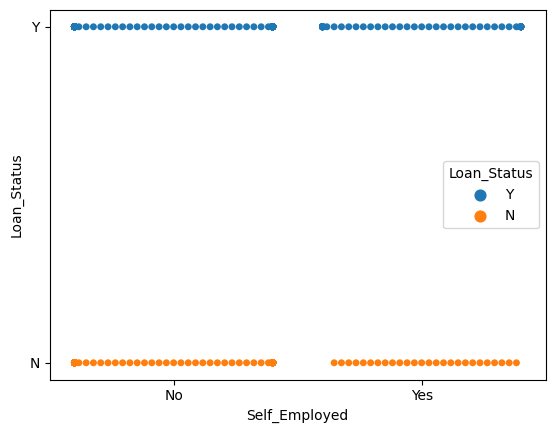

In [565]:
sns.swarmplot(x='Self_Employed',y='Loan_Status',data=df,hue='Loan_Status')

Self employed applicants have slightly higer chance of getting loan than other applicants.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

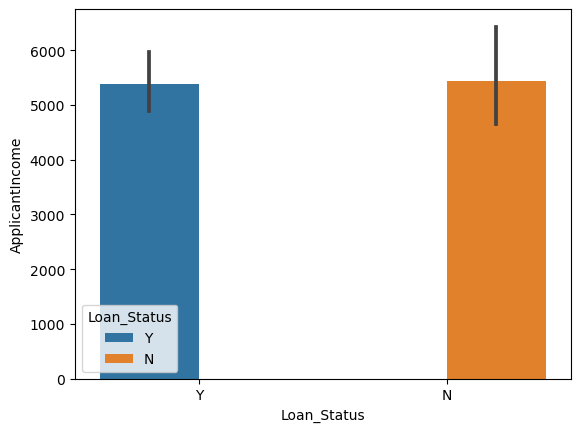

In [566]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df,hue='Loan_Status')

applicants with less income are slightly likely to get loan than the applicants with high income.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

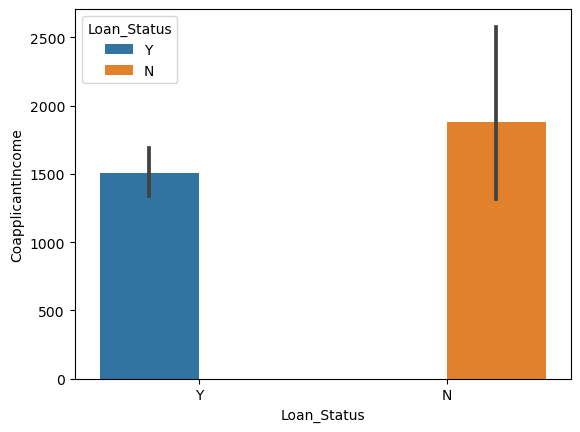

In [567]:
sns.barplot(x='Loan_Status',y='CoapplicantIncome',data=df,hue='Loan_Status')

applicants with less coapplicantincome are more likely to get loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

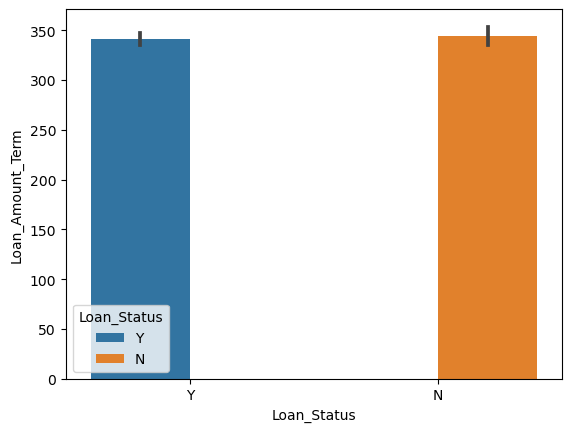

In [568]:
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',data=df,hue='Loan_Status')

chances of getting loan slightly higher for the employees with less loan amount term.

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

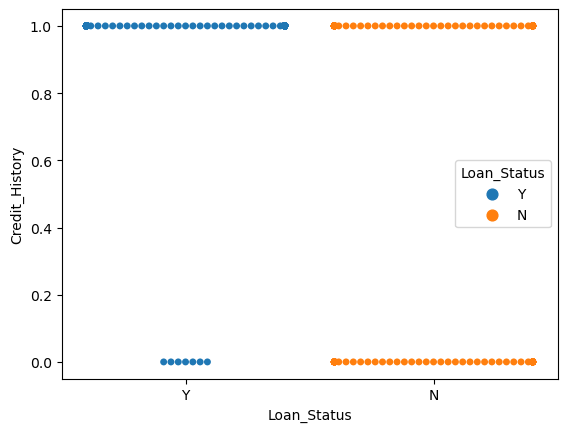

In [569]:
sns.swarmplot(x='Loan_Status',y='Credit_History',data=df,hue='Loan_Status')

Applicants with the ability to repay all debts are most likely to get loan than the applicants with non ability to repay all debts.

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

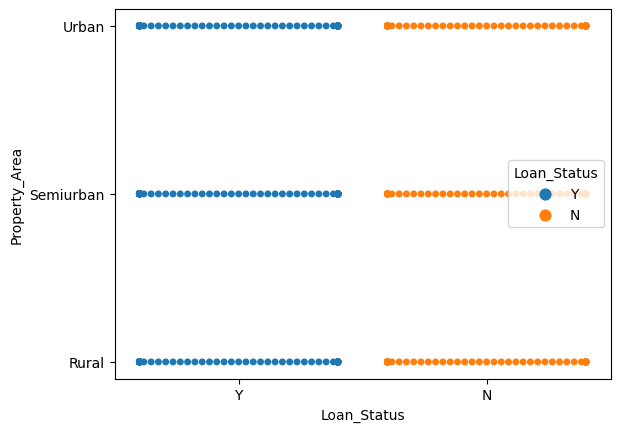

In [570]:
sns.swarmplot(x='Loan_Status',y='Property_Area',data=df,hue='Loan_Status')

there is no specific pattern in bw property area & loan status.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

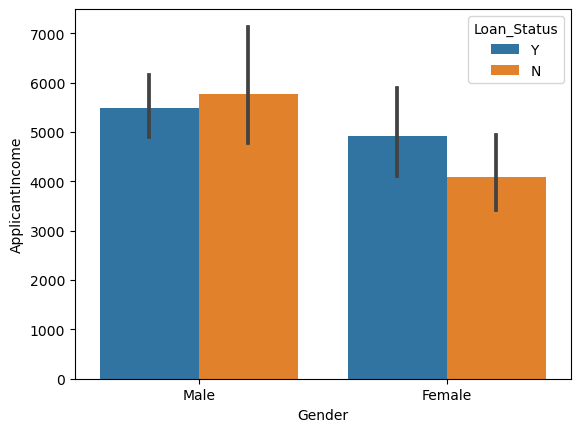

In [571]:
sns.barplot(x='Gender',y='ApplicantIncome',data=df,hue='Loan_Status')

male applicants having less income & female applicants having high income has high chances of getting the loan.

<AxesSubplot:xlabel='Gender', ylabel='CoapplicantIncome'>

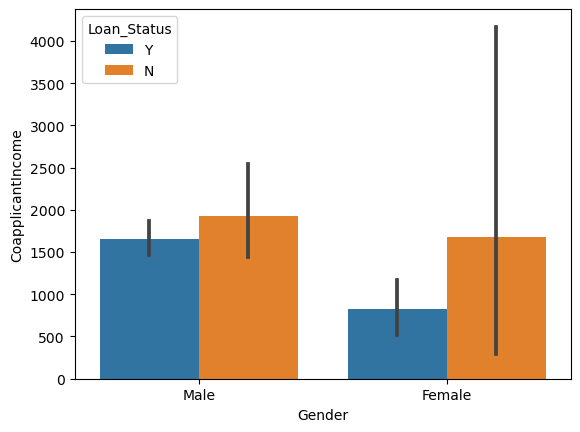

In [572]:
sns.barplot(x='Gender',y='CoapplicantIncome',data=df,hue='Loan_Status')

Male applicants having low coapplicant income & female applicants also having less coapplicant income are more likely to get loan.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

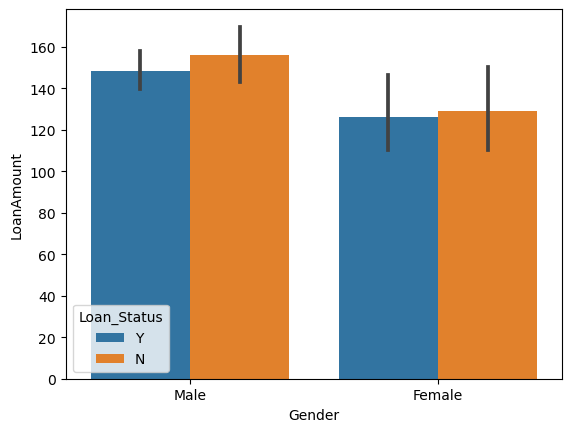

In [573]:
sns.barplot(x='Gender',y='LoanAmount',data=df,hue='Loan_Status')

Male & female applicants with less loan amount are more likely to get the loan.

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

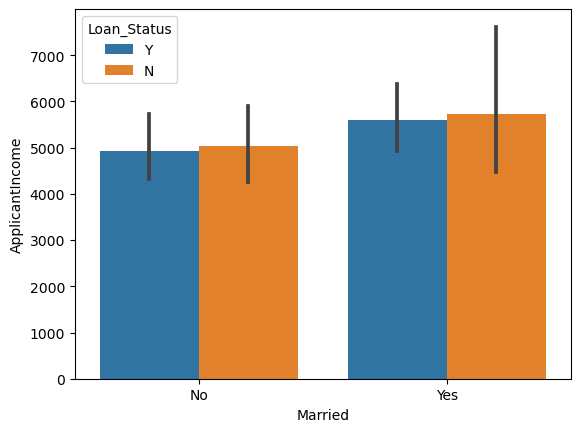

In [574]:
sns.barplot(x='Married',y='ApplicantIncome',data=df,hue='Loan_Status')

married or non married applicants with less income are slightly more likely to get loan. 

<AxesSubplot:xlabel='Married', ylabel='CoapplicantIncome'>

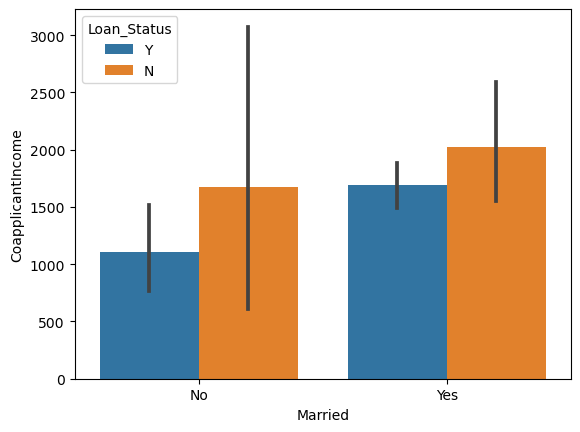

In [575]:
sns.barplot(x='Married',y='CoapplicantIncome',data=df,hue='Loan_Status')

Married or non married applicants with less coapplicant income has higher chances of getting the loan.

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

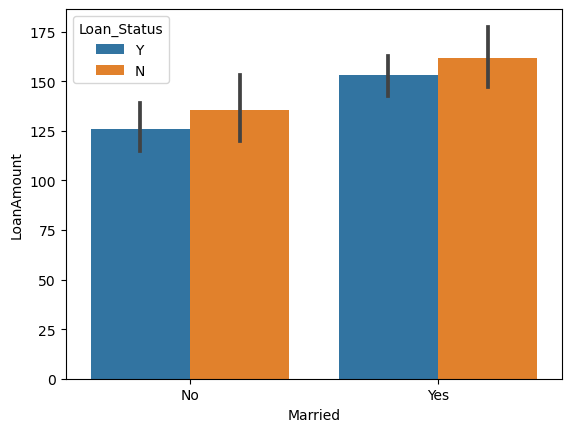

In [576]:
sns.barplot(x='Married',y='LoanAmount',data=df,hue='Loan_Status')

Married or non married applicants with less loan amount has higher chances of getting the loan.

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

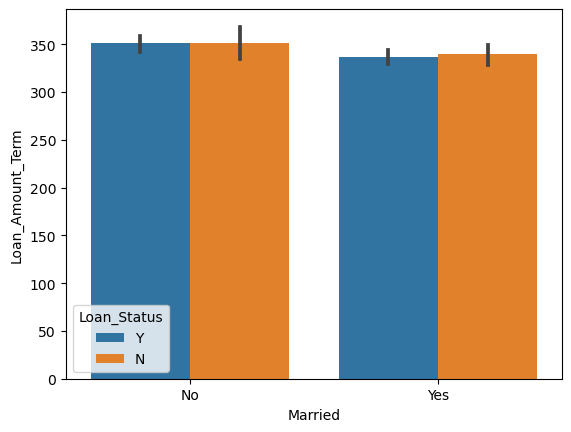

In [577]:
sns.barplot(x='Married',y='Loan_Amount_Term',data=df,hue='Loan_Status')

no specific pattern can be seen here bw married & loan amount term.

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

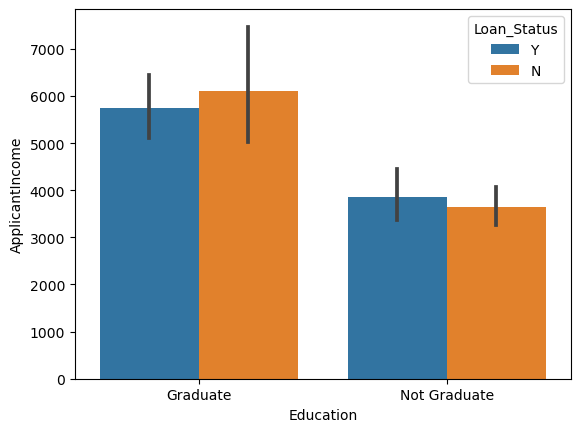

In [578]:
sns.barplot(x='Education',y='ApplicantIncome',data=df,hue='Loan_Status')

Graduate applicants with less income are more likely to get the loan while not graduate applicant with high income are more likely to get the loan.

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

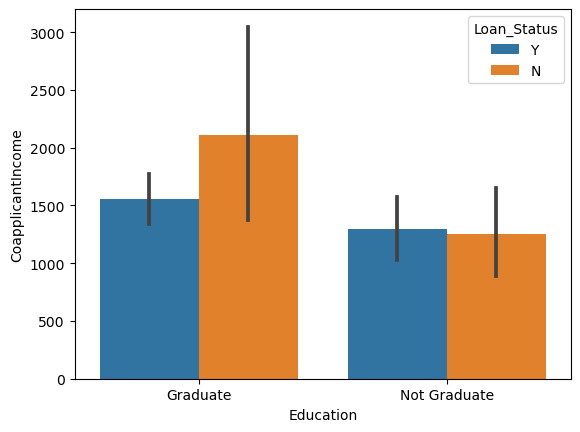

In [579]:
sns.barplot(x='Education',y='CoapplicantIncome',data=df,hue='Loan_Status')

Graduate applicants with less coapplicant income are more likely to get the loan.

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

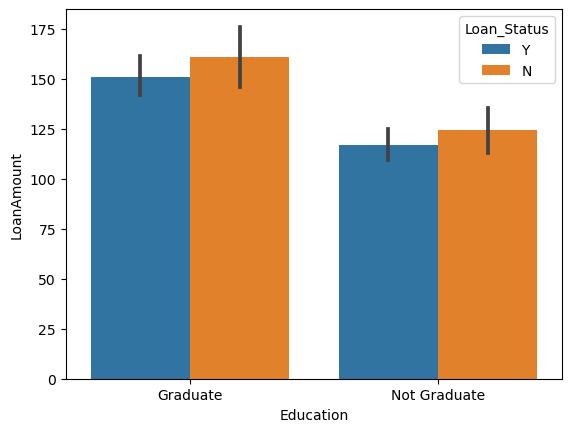

In [580]:
sns.barplot(x='Education',y='LoanAmount',data=df,hue='Loan_Status')

Graduate or Not graduate applicants with less loan amount are likely to get the loan.

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

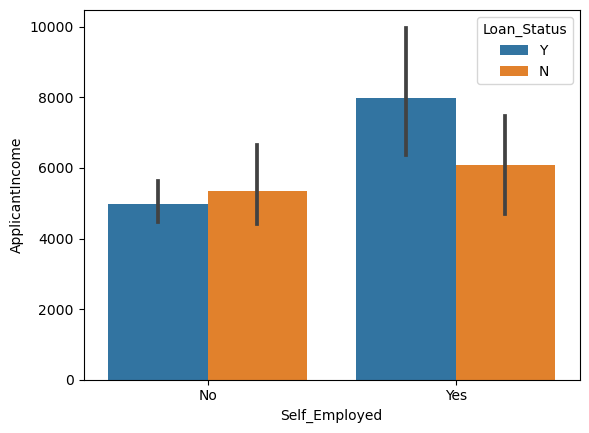

In [581]:
sns.barplot(x='Self_Employed',y='ApplicantIncome',data=df,hue='Loan_Status')

self employed applicants with high income are more likely to get the loan.

<AxesSubplot:xlabel='Self_Employed', ylabel='CoapplicantIncome'>

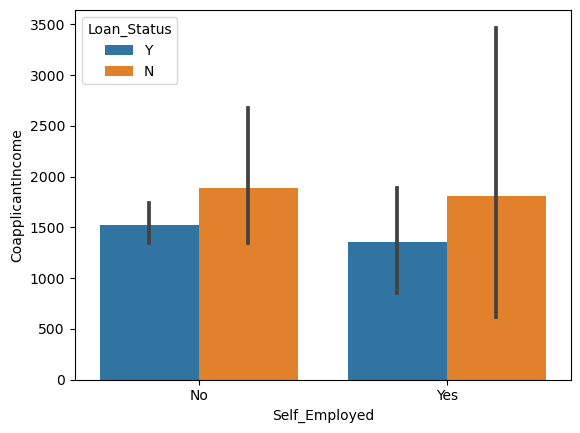

In [582]:
sns.barplot(x='Self_Employed',y='CoapplicantIncome',data=df,hue='Loan_Status')

self employed applicants with less coapplicant income are more likely to get the loan.

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

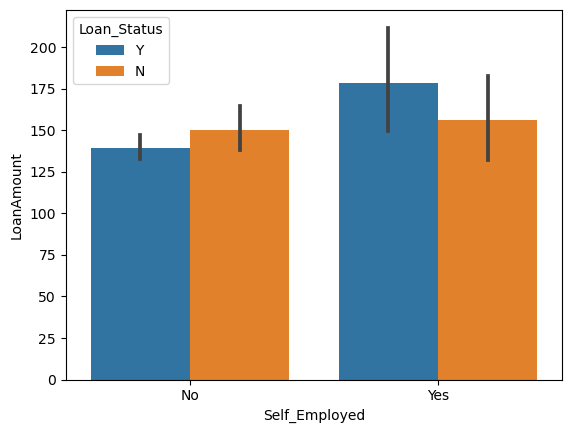

In [583]:
sns.barplot(x='Self_Employed',y='LoanAmount',data=df,hue='Loan_Status')

self employed applicants with higher loan amount are more likely to get the loan.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

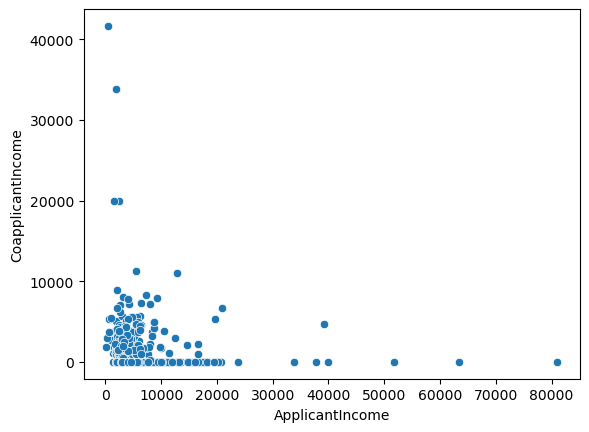

In [584]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',data=df)

There is no such relationship can be seen bw coapplicant income & applicant income.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

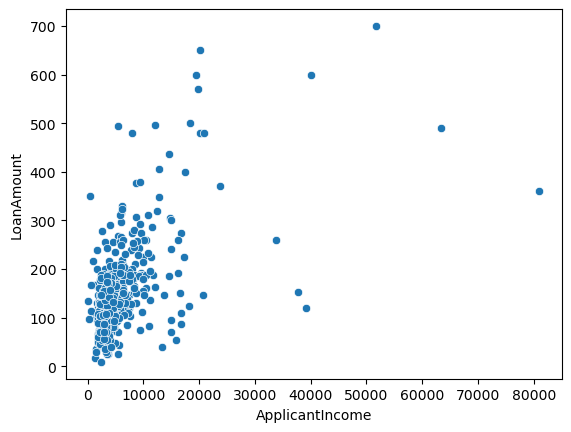

In [585]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)

There is slight positive correlationship can be seen bw loan amount & applicant income.

In [586]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Correlation matrix-

Text(0.5, 1.0, 'Correlationship among columns')

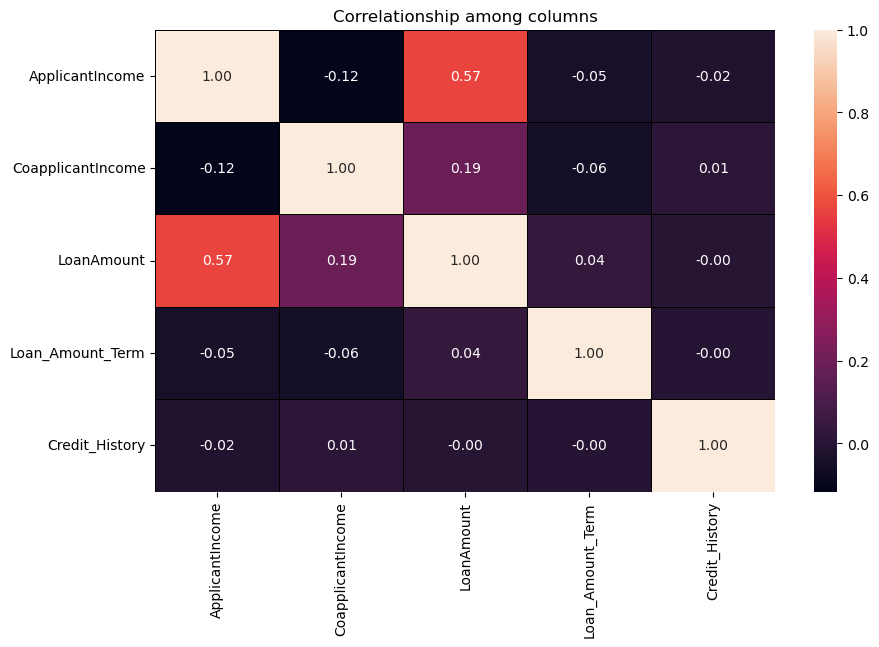

In [883]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=.5,linecolor='Black')
plt.title('Correlationship among columns')

# Observations-

1. There is 57% correlationship bw loan amount & applicant income.
2. There is negetive correlationship bw coapplicant income & applicant income.
3. There is positive correlationship bw loan amount & coapplicant income.

# Mutivariate analysis-

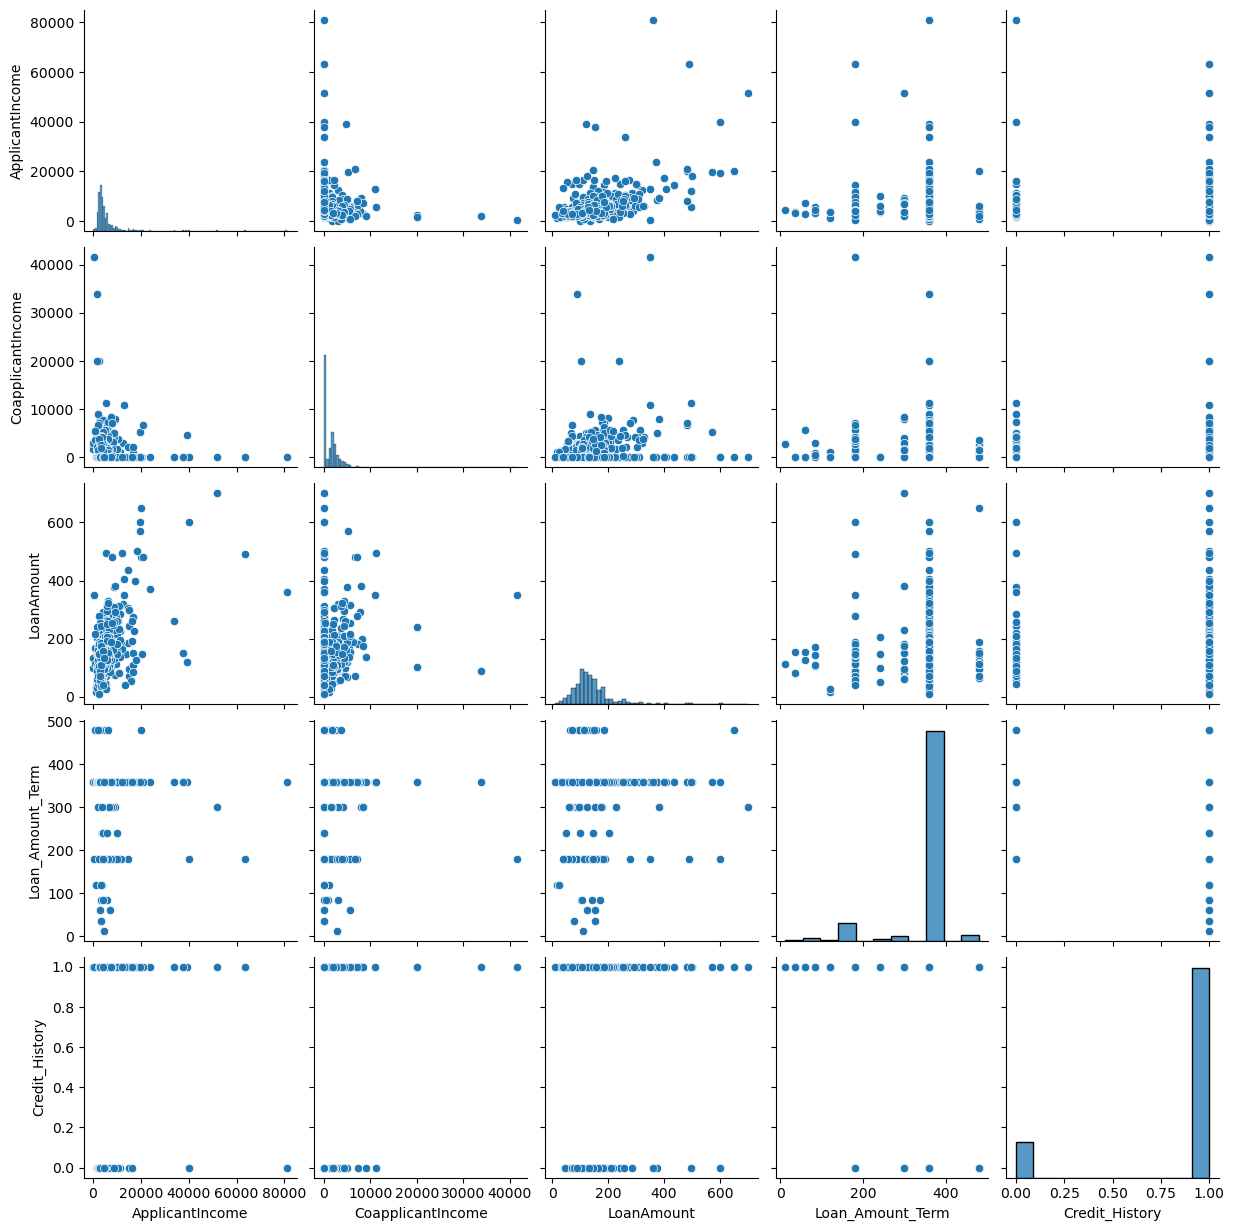

In [884]:
sns.pairplot(df)

# Observations-

1. There is positive correlationship bw loan amount & applicant income.
2. There is negetive correlationship bw coapplicant income & applicant income.
3. There is positive correlationship bw loan amount & coapplicant income.
4. There is negetive correlationship bw loan amount term & applicant income.
5. There is negetive correlationship bw loan amount term & co-applicant income.

# Separating continous data columns-

In [1261]:
continous=[]

for i in df.columns:
    if df[i].dtype=='int64':
        continous.append(i)
    elif df[i].dtype=='float64':
        continous.append(i)
continous        

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Checking distribution of data in numeric data columns-

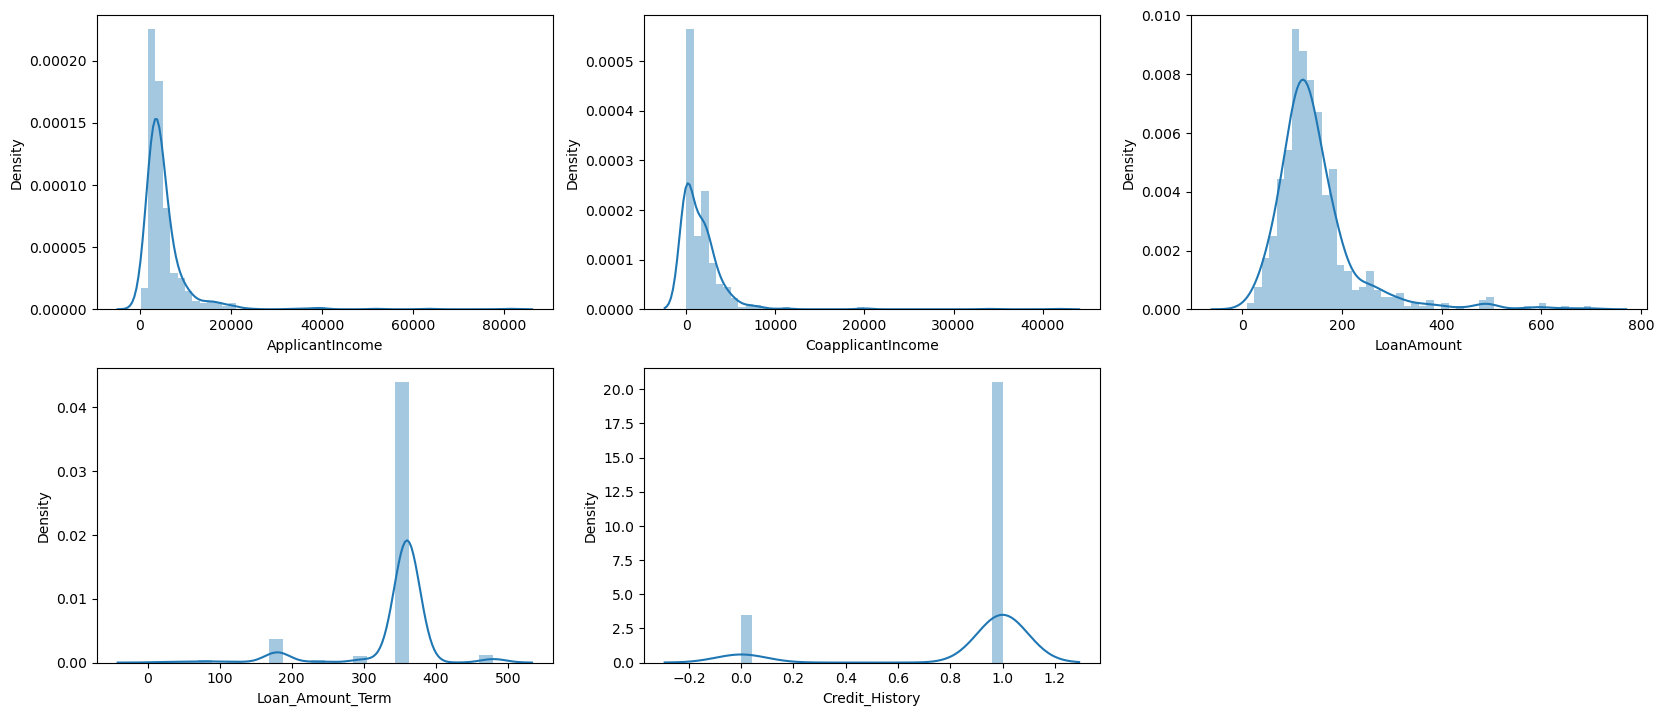

In [1262]:
plt.figure(figsize=(20,13))
plotnumber=1

for col in continous:
    if plotnumber<=5:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show()   

Here we can see the skewness in all the columns above presented in the data distribution graph.

In [1263]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Here we can see the skewness in all the columns is above acceptable range i.e. -0.5 to +0.5.

# Removal of skewness through Power transformer method-

In [1264]:
from sklearn.preprocessing import PowerTransformer

In [1265]:
features=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [1266]:
x=PowerTransformer(method='yeo-johnson') 
df[features]=x.fit_transform(df[features].values)

In [1267]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.544331,-1.102837,0.235387,0.175540,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,0.170974,0.750578,-0.037659,0.175540,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.499955,-1.102837,-1.346305,0.175540,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.743873,0.891686,-0.167886,0.175540,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.582817,-1.102837,0.158610,0.175540,0.411733,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.554885,-1.102837,-1.205100,0.175540,0.411733,Rural,Y
610,Male,Yes,3+,Graduate,No,-0.000290,-1.102837,-2.293317,-2.312879,0.411733,Rural,Y
611,Male,Yes,1,Graduate,No,1.023487,0.208603,1.372409,0.175540,0.411733,Urban,Y
612,Male,Yes,2,Graduate,No,0.931750,-1.102837,0.738924,0.175540,0.411733,Urban,Y


In [1268]:
df.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Credit_History      -2.021971
dtype: float64

Here we can see that the skewness has been removed from the columns now we can see that in credit history the skewness is above acceptable range but we are not worried about it as this column has categorical data.so we can move further in model building.

# Checking for the outliers throgh box-plot-

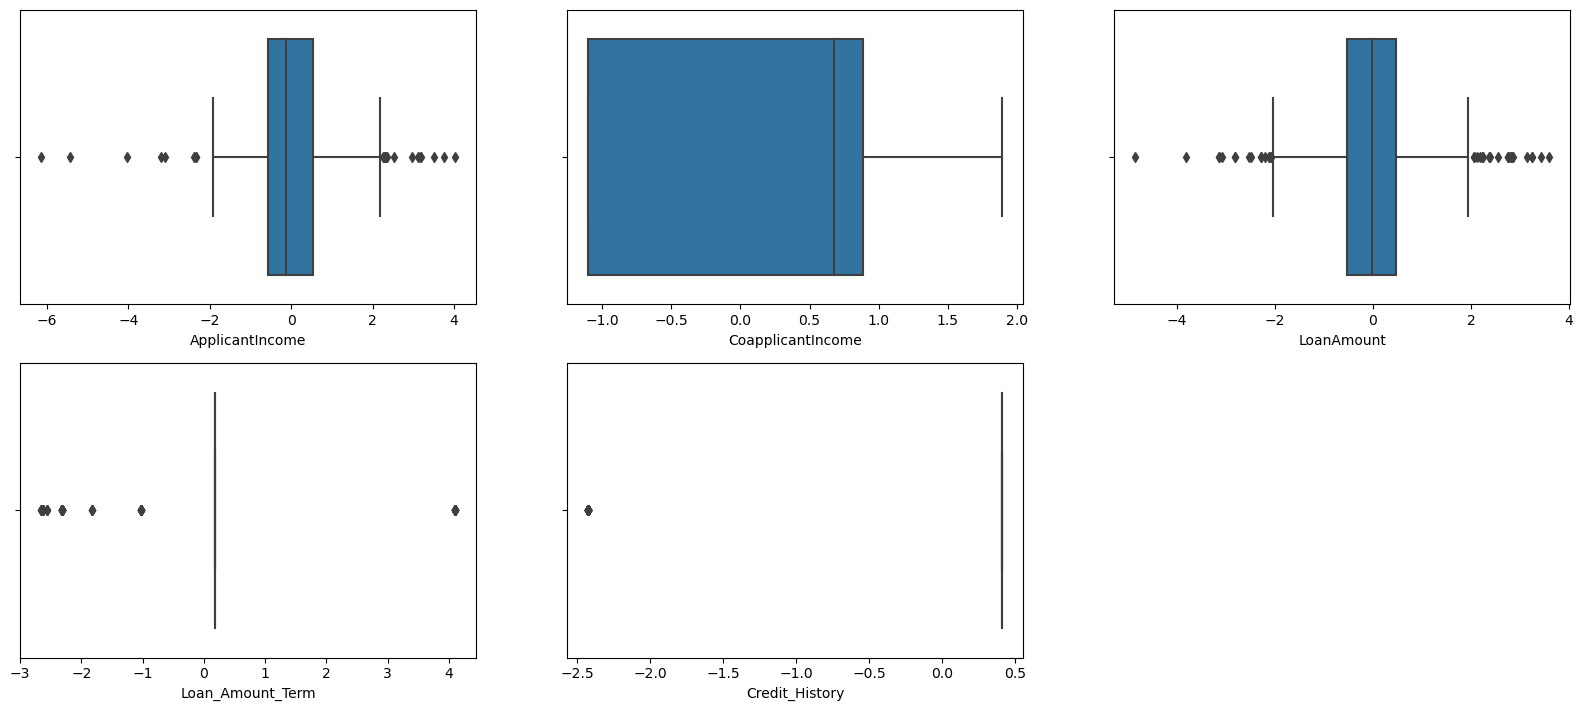

In [1269]:
plt.figure(figsize=(20,13))
plotnumber=1

for col in continous:
    if plotnumber<=5:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show()   

Here we can see that outliers present in all the continous data column except coapplicantincome column as shown in above graph.

# Outliers removal through IQR method-

In [1270]:
#upper side outliers-q3+(1.5*IQR)
#lower side outliers-q1-(1.5*IQR)


q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

In [1271]:
ApplicantIncome_high=(q3.ApplicantIncome+(1.5*IQR.ApplicantIncome))


index=np.where(df['ApplicantIncome']> ApplicantIncome_high)

df=df.drop(df.index[index])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.544331,-1.102837,0.235387,0.175540,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,0.170974,0.750578,-0.037659,0.175540,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.499955,-1.102837,-1.346305,0.175540,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.743873,0.891686,-0.167886,0.175540,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.582817,-1.102837,0.158610,0.175540,0.411733,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.554885,-1.102837,-1.205100,0.175540,0.411733,Rural,Y
610,Male,Yes,3+,Graduate,No,-0.000290,-1.102837,-2.293317,-2.312879,0.411733,Rural,Y
611,Male,Yes,1,Graduate,No,1.023487,0.208603,1.372409,0.175540,0.411733,Urban,Y
612,Male,Yes,2,Graduate,No,0.931750,-1.102837,0.738924,0.175540,0.411733,Urban,Y


In [1272]:
LoanAmount_high=(q3.LoanAmount+(1.5*IQR.LoanAmount))


index=np.where(df['LoanAmount']>LoanAmount_high)

df=df.drop(df.index[index])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.544331,-1.102837,0.235387,0.175540,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,0.170974,0.750578,-0.037659,0.175540,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.499955,-1.102837,-1.346305,0.175540,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.743873,0.891686,-0.167886,0.175540,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.582817,-1.102837,0.158610,0.175540,0.411733,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.554885,-1.102837,-1.205100,0.175540,0.411733,Rural,Y
610,Male,Yes,3+,Graduate,No,-0.000290,-1.102837,-2.293317,-2.312879,0.411733,Rural,Y
611,Male,Yes,1,Graduate,No,1.023487,0.208603,1.372409,0.175540,0.411733,Urban,Y
612,Male,Yes,2,Graduate,No,0.931750,-1.102837,0.738924,0.175540,0.411733,Urban,Y


In [1273]:
ApplicantIncome_low=q1.ApplicantIncome-(1.5*IQR.ApplicantIncome)

index=np.where(df['ApplicantIncome']<ApplicantIncome_low)

df=df.drop(df.index[index])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.544331,-1.102837,0.235387,0.175540,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,0.170974,0.750578,-0.037659,0.175540,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.499955,-1.102837,-1.346305,0.175540,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.743873,0.891686,-0.167886,0.175540,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.582817,-1.102837,0.158610,0.175540,0.411733,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.554885,-1.102837,-1.205100,0.175540,0.411733,Rural,Y
610,Male,Yes,3+,Graduate,No,-0.000290,-1.102837,-2.293317,-2.312879,0.411733,Rural,Y
611,Male,Yes,1,Graduate,No,1.023487,0.208603,1.372409,0.175540,0.411733,Urban,Y
612,Male,Yes,2,Graduate,No,0.931750,-1.102837,0.738924,0.175540,0.411733,Urban,Y


In [1274]:
LoanAmount_low=q1.LoanAmount-(1.5*IQR.LoanAmount)

index=np.where(df['LoanAmount']<LoanAmount_low)

df=df.drop(df.index[index])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.544331,-1.102837,0.235387,0.17554,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,0.170974,0.750578,-0.037659,0.17554,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.499955,-1.102837,-1.346305,0.17554,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.743873,0.891686,-0.167886,0.17554,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.582817,-1.102837,0.158610,0.17554,0.411733,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,-0.379921,0.831258,-0.379235,0.17554,0.411733,Rural,Y
609,Female,No,0,Graduate,No,-0.554885,-1.102837,-1.205100,0.17554,0.411733,Rural,Y
611,Male,Yes,1,Graduate,No,1.023487,0.208603,1.372409,0.17554,0.411733,Urban,Y
612,Male,Yes,2,Graduate,No,0.931750,-1.102837,0.738924,0.17554,0.411733,Urban,Y


Here we can see that the data loss is only 8% which is under acceptable range so we can move further for model building.      

We have not removed outliers from credit history & loan amount term column as these column contains categorical data.

# Encoding of object data using label encoder- 

In [1275]:
from sklearn.preprocessing import LabelEncoder

In [1276]:
x= LabelEncoder()

In [1277]:
df1=x.fit_transform(df['Gender'])
pd.Series(df1)

0      1
1      1
2      1
3      1
4      1
      ..
561    1
562    0
563    1
564    1
565    0
Length: 566, dtype: int32

In [1278]:
df2=x.fit_transform(df['Married'])
pd.Series(df2)

0      0
1      1
2      1
3      1
4      0
      ..
561    1
562    0
563    1
564    1
565    0
Length: 566, dtype: int32

In [1279]:
df3=x.fit_transform(df['Education'])
pd.Series(df3)

0      0
1      0
2      0
3      1
4      0
      ..
561    0
562    0
563    0
564    0
565    0
Length: 566, dtype: int32

In [1280]:
df4=x.fit_transform(df['Self_Employed'])
pd.Series(df4)

0      0
1      0
2      1
3      0
4      0
      ..
561    0
562    0
563    0
564    0
565    1
Length: 566, dtype: int32

In [1281]:
df5=x.fit_transform(df['Property_Area'])
pd.Series(df5)

0      2
1      0
2      2
3      2
4      2
      ..
561    0
562    0
563    2
564    2
565    1
Length: 566, dtype: int32

In [1282]:
df6=x.fit_transform(df['Loan_Status'])
pd.Series(df6)

0      1
1      0
2      1
3      1
4      1
      ..
561    1
562    1
563    1
564    1
565    0
Length: 566, dtype: int32

In [1283]:
df7=x.fit_transform(df['Dependents'])
pd.Series(df7)

0      0
1      1
2      0
3      0
4      0
      ..
561    0
562    0
563    1
564    2
565    0
Length: 566, dtype: int32

In [1284]:
df['Gender']=df1

In [1285]:
df['Married']=df2

In [1286]:
df['Education']=df3

In [1287]:
df['Self_Employed']=df4

In [1288]:
df['Property_Area']=df5

In [1289]:
df['Loan_Status']=df6

In [1290]:
df['Dependents']=df7

In [1291]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.17554,0.411733,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.17554,0.411733,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.17554,0.411733,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.17554,0.411733,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.17554,0.411733,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.379921,0.831258,-0.379235,0.17554,0.411733,0,1
609,0,0,0,0,0,-0.554885,-1.102837,-1.205100,0.17554,0.411733,0,1
611,1,1,1,0,0,1.023487,0.208603,1.372409,0.17554,0.411733,2,1
612,1,1,2,0,0,0.931750,-1.102837,0.738924,0.17554,0.411733,2,1


Here we can see that all the object data has been encoded now so we can move further for model building.

# Checking data statistics again after encoding of data- 

In [620]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,0.819788,0.644876,0.724382,0.227915,0.127208,-0.034605,0.016097,-0.025578,0.016356,-0.009825,1.042403,0.687279
std,0.384704,0.478974,1.000003,0.419859,0.333501,0.768558,0.990569,0.757910,0.964139,1.010705,0.785918,0.464012
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.809085,-1.102837,-2.032830,-2.664178,-2.428760,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-0.563307,-1.102837,-0.473815,0.175540,0.411733,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-0.143059,0.694298,-0.037659,0.175540,0.411733,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.457852,0.877242,0.417066,0.175540,0.411733,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,2.162911,1.814404,1.939663,4.104711,0.411733,2.000000,1.000000


In [ ]:
# Observations-

1. The count of all the column values is same which means there are no null values present in the dataset.
2. The mean is greater than the median in the columns like ApplicantIncome,CoapplicantIncome,LoanAmount which means data may be right skewed in this columns.
3. The median is greater than mean in columns like Loan_Amount_Term & Credit_History which means data is left skewed in these columns.
4. There is huge gap bw 75% & max value in the columns like ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term which means there may be outliers present in the dataset.
5. Very high amount of outliers present in applicantincome column as there is very high gap in 75% and max value in this column.

# Correlation matrix-

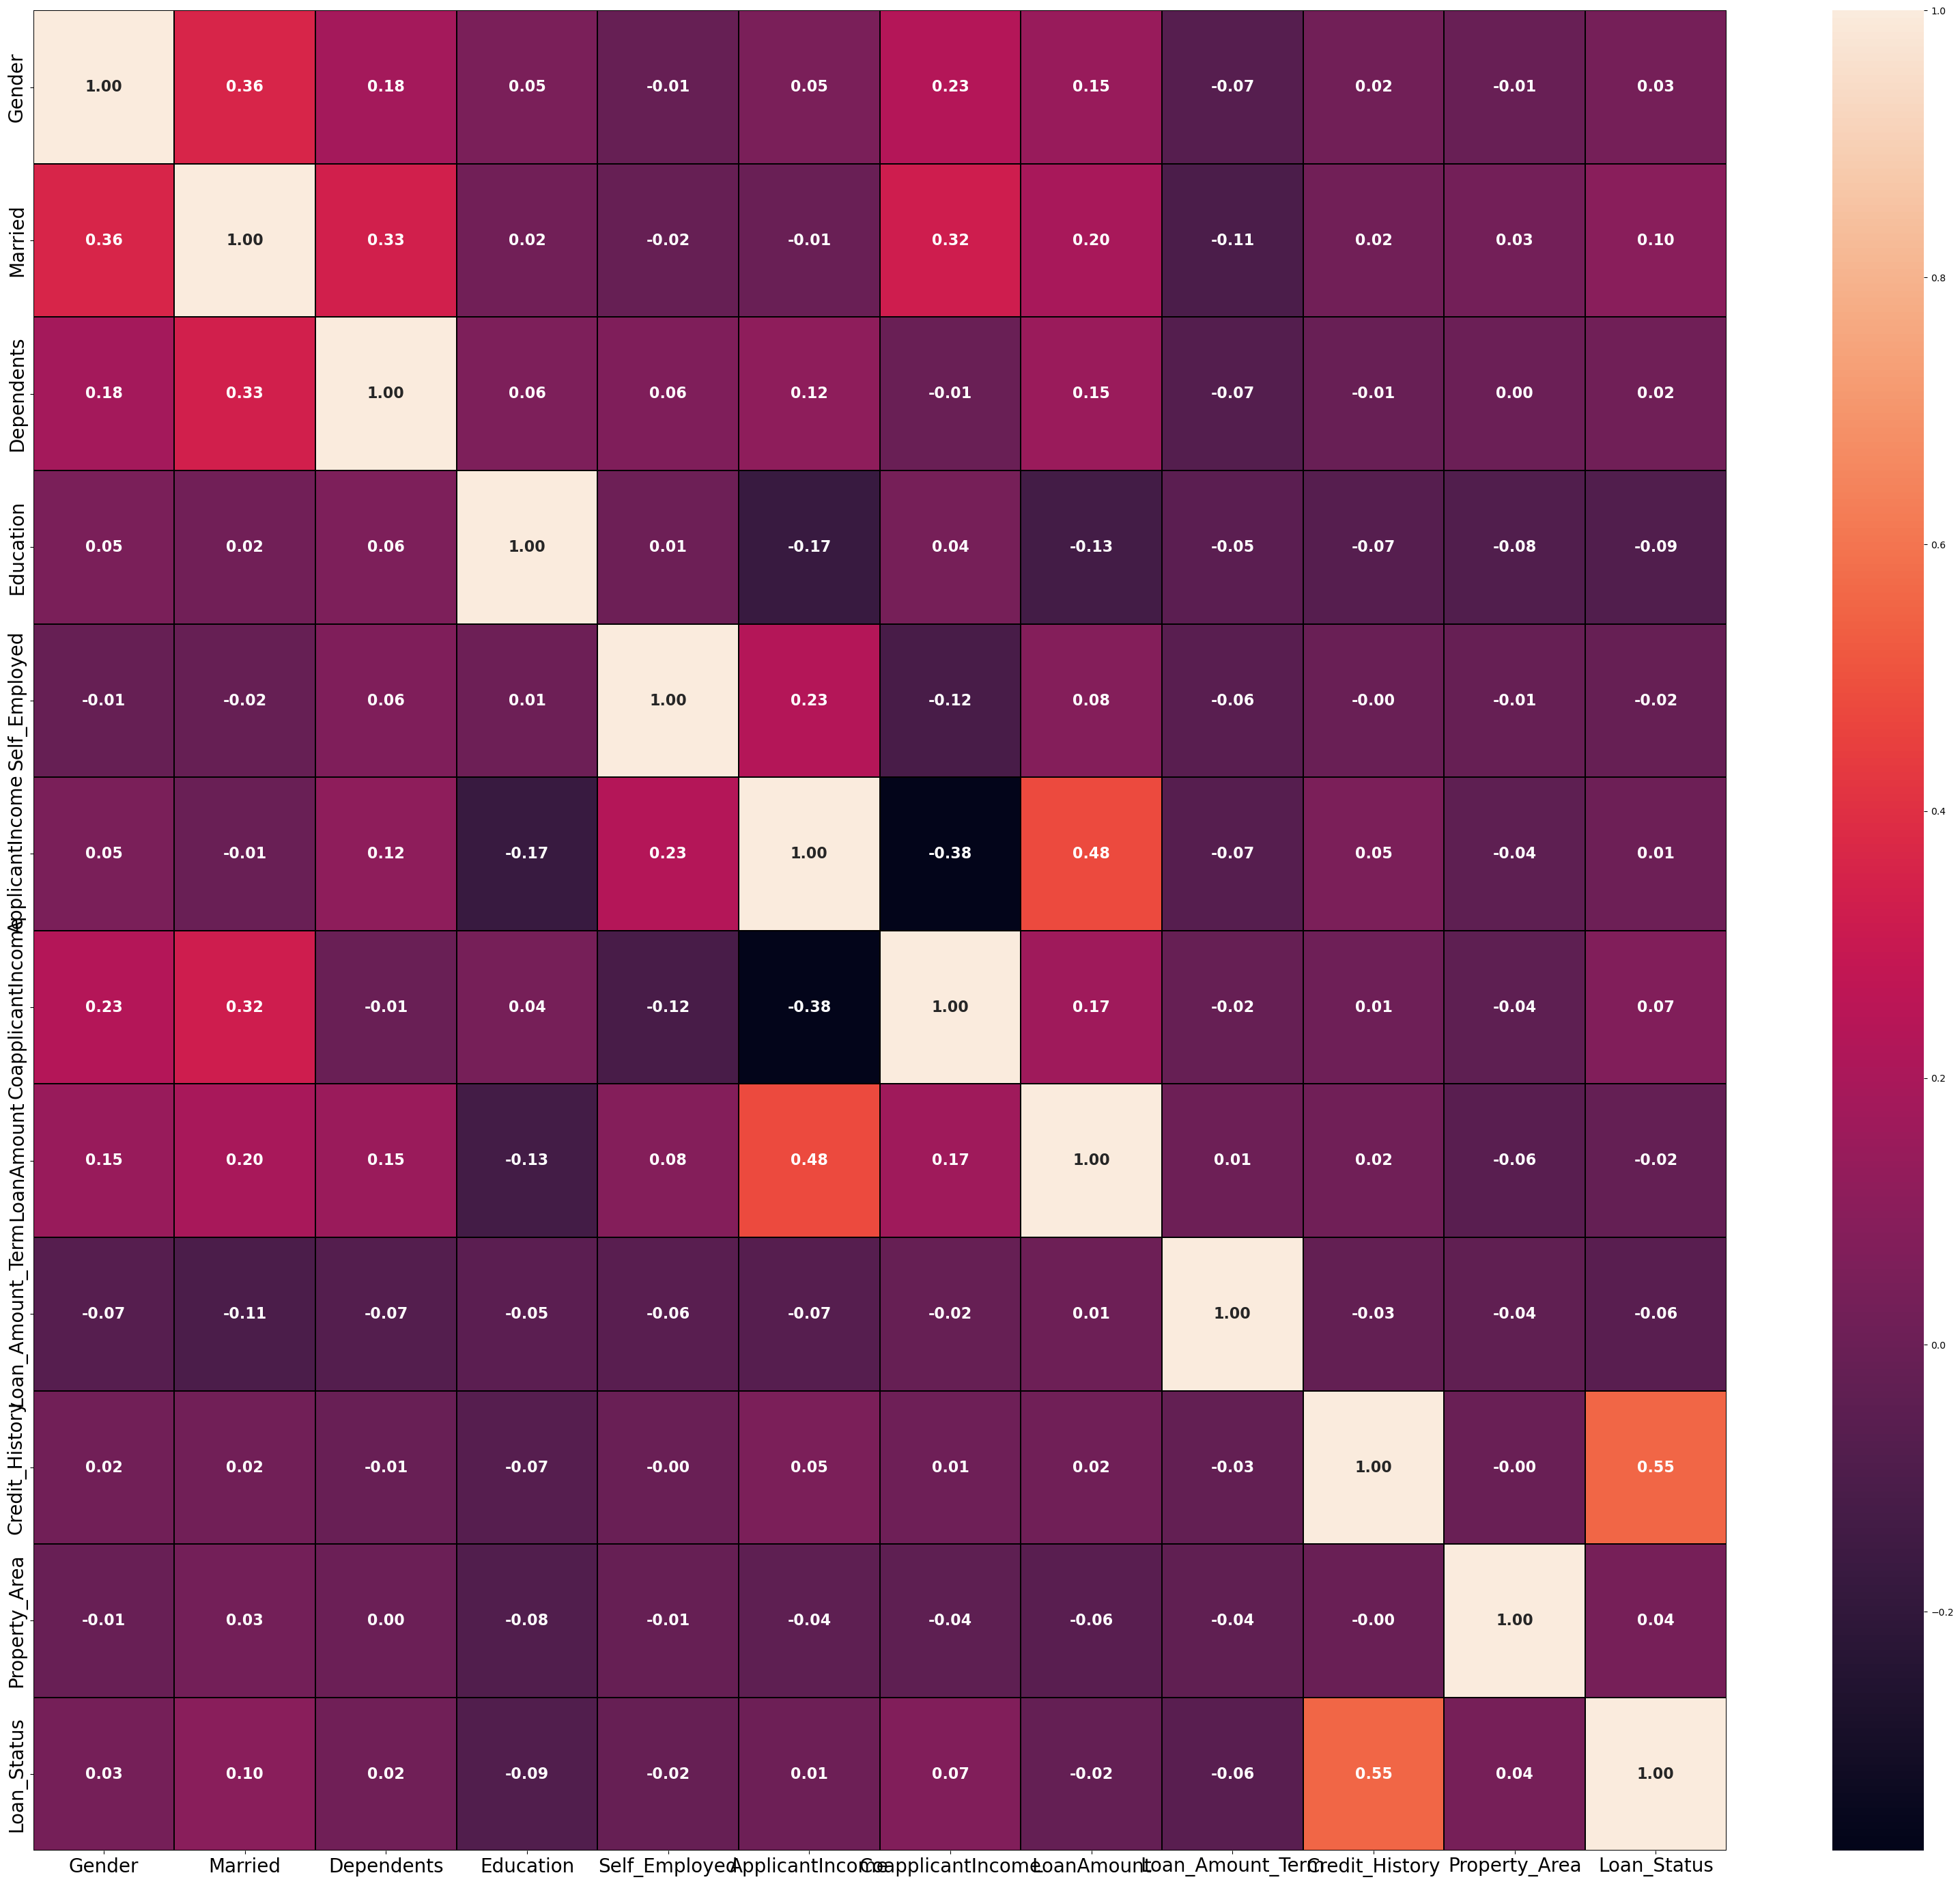

In [621]:
plt.figure(figsize=(40,35))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show() 

# Correlation bw features & label-

In [622]:
df.corr()['Loan_Status'].sort_values()

Education           -0.087751
Loan_Amount_Term    -0.058151
LoanAmount          -0.023465
Self_Employed       -0.016974
ApplicantIncome      0.006803
Dependents           0.016080
Gender               0.030761
Property_Area        0.036426
CoapplicantIncome    0.073160
Married              0.096703
Credit_History       0.554557
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

Education,loan_amount_term,loanamount,self_employed has negetive correlationship with our target variable.

# Graphical Representation of correlationship between features & target variable-

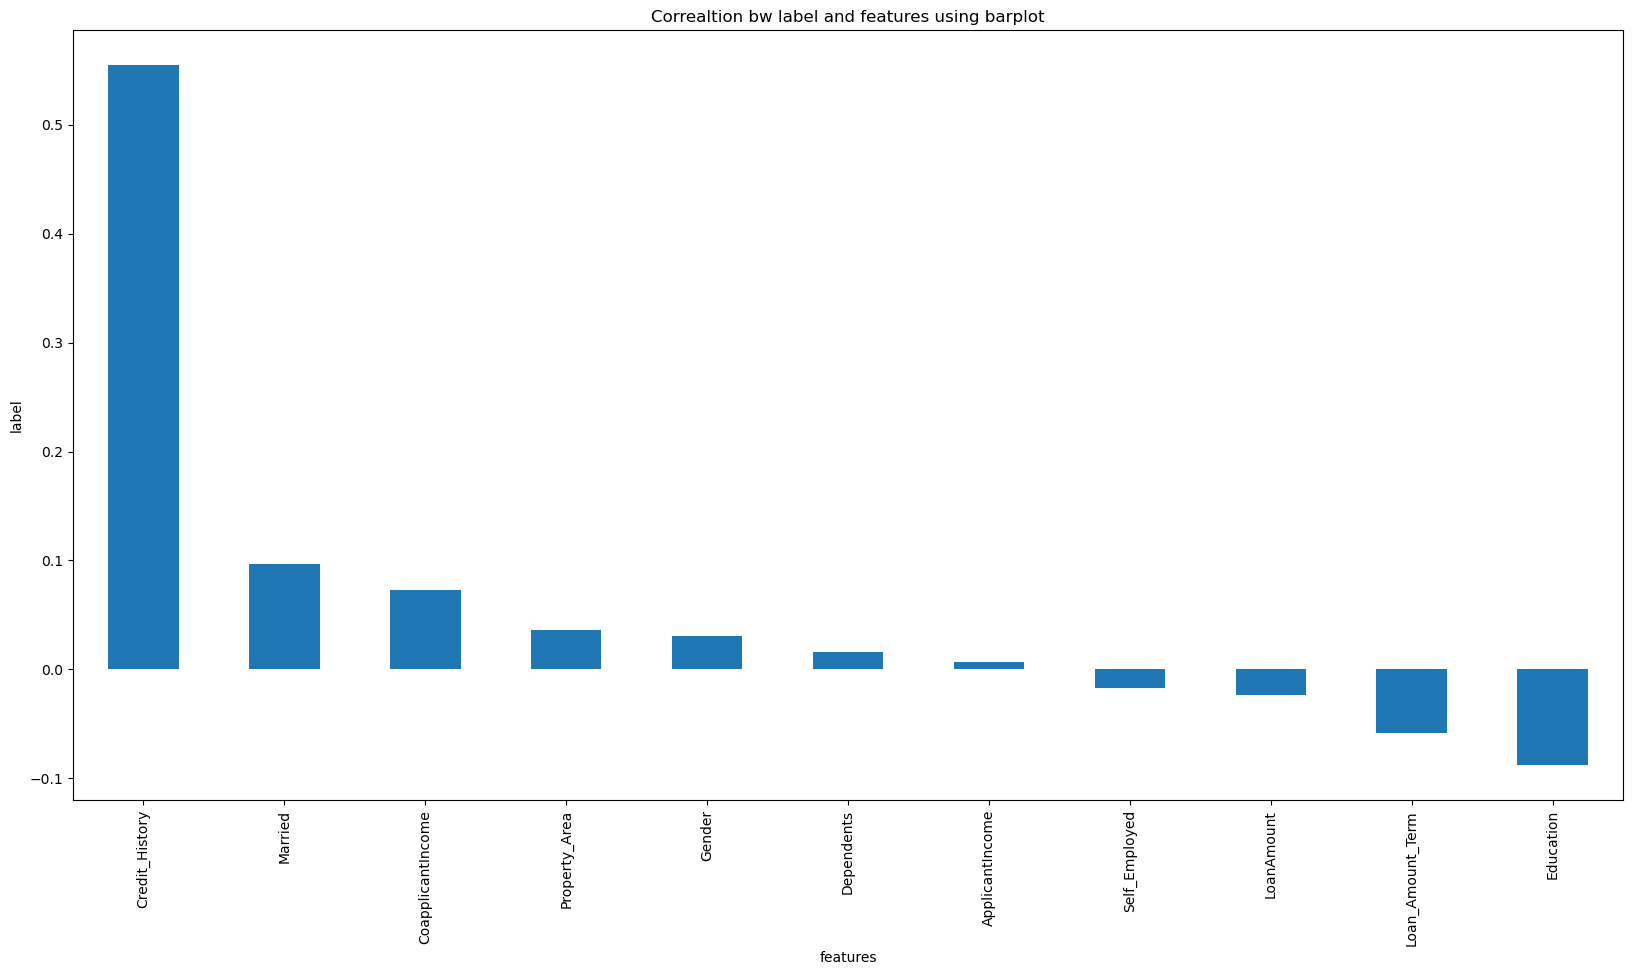

In [623]:
plt.figure(figsize=(20,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Observations-

1. Here from the above graph we can see that credit_history column has the highest correlationship with target variable.    
2. Applicant income has the lowest relationship with our target variable i.e. loan_status.

# Separating features and label-

In [624]:
x=df.drop('Loan_Status',axis=1)  #separting label and target.
y=df['Loan_Status']

# Feature Scaling-

In [625]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.468858,-1.347561,-0.725020,-0.543318,-0.381771,0.753942,-1.130586,0.344626,0.165251,0.417461,1.219521
1,0.468858,0.742081,0.275861,-0.543318,-0.381771,0.267723,0.742130,-0.015954,0.165251,0.417461,-1.327523
2,0.468858,0.742081,-0.725020,-0.543318,2.619372,-0.606020,-1.130586,-1.744133,0.165251,0.417461,1.219521
3,0.468858,0.742081,-0.725020,1.840543,-0.381771,-0.923672,0.884708,-0.187930,0.165251,0.417461,1.219521
4,0.468858,-1.347561,-0.725020,-0.543318,-0.381771,0.804061,-1.130586,0.243235,0.165251,0.417461,1.219521
...,...,...,...,...,...,...,...,...,...,...,...
561,0.468858,0.742081,-0.725020,-0.543318,-0.381771,-0.449701,0.823651,-0.467034,0.165251,0.417461,-1.327523
562,-2.132843,-1.347561,-0.725020,-0.543318,-0.381771,-0.677555,-1.130586,-1.557660,0.165251,0.417461,-1.327523
563,0.468858,0.742081,0.275861,-0.543318,-0.381771,1.377941,0.194511,1.846160,0.165251,0.417461,1.219521
564,0.468858,0.742081,1.276743,-0.543318,-0.381771,1.258473,-1.130586,1.009589,0.165251,0.417461,1.219521


Now the data has been scaled.

# Checking Multicollinearity among features-

In [626]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.200770,Gender
1,1.399654,Married
2,1.177865,Dependents
3,1.066233,Education
4,1.066371,Self_Employed
5,1.947644,ApplicantIncome
6,1.629607,CoapplicantIncome
7,1.632451,LoanAmount
8,1.033503,Loan_Amount_Term
9,1.010136,Credit_History


Here we can see that the multicollinearity is within acceptable range(<10) so we can move further for model building-

# Treating Class imbalance with Oversampling method-

In [627]:
y.value_counts()

1    389
0    177
Name: Loan_Status, dtype: int64

Here we can see the data is not balanced, since it is a classification problem we will balance the data using oversampling method-

In [628]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [629]:
y.value_counts()

1    389
0    389
Name: Loan_Status, dtype: int64

Now the data is balanced.now we can build machine learning classification models further-

# Model-I (With all features without feature engineering)

In [630]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)               

Best accuracy is 0.8974358974358975 at random state 138


Here we can see that at random state 138 our model performing best and giving highest accuracy of almost 90% so we will use this random state for splitting of the data.

In [632]:
# Splitting of data on the same random state-

In [633]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [634]:
#Importing library-

In [635]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [690]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('=====================Test Result=====================') 
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Confusion matrix\n', confusion_matrix(y_test,pred))
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [691]:
#Random forest-

In [692]:
rf=RandomForestClassifier() 

rf.fit(x_train,y_train)

RandomForestClassifier()

In [693]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) 
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:87.18%


 Confusion matrix
 [[ 89  19]
 [ 11 115]]


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.82      0.86       108
           1       0.86      0.91      0.88       126

    accuracy                           0.87       234
   macro avg       0.87      0.87      0.87       234
weighted avg       0.87      0.87      0.87       234



from Random forest classifier we are getting training accuracy-100% & test accuracy-88% which looks like an overfitted model as train accuray is 100%.

In [694]:
#Cross validation score-

In [695]:
score=cross_val_score(rf,x,y)
print(score)
print(score.mean())

[0.75641026 0.76923077 0.86538462 0.87741935 0.89032258]
0.8317535153019024


For Random forest classifier model cross validation score is 85%

In [696]:
#Logistic regression-

In [697]:
lr=LogisticRegression() 
lr.fit(x_train,y_train)

LogisticRegression()

In [698]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) 
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 70.22%
=====================Test Result=====================
accuracy_score:68.38%


 Confusion matrix
 [[ 50  58]
 [ 16 110]]


 Test classification report
               precision    recall  f1-score   support

           0       0.76      0.46      0.57       108
           1       0.65      0.87      0.75       126

    accuracy                           0.68       234
   macro avg       0.71      0.67      0.66       234
weighted avg       0.70      0.68      0.67       234



from Logistic Regression we are getting training accuracy-70% & test accuracy-68% with F1 Score-68% which seems like an underfitted model.

In [699]:
#Cross validation score-

In [700]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())

[0.69871795 0.73076923 0.75641026 0.66451613 0.69032258]
0.7081472291149711


Cross validation score for Logistic Regression is 71%

In [701]:
#Support vector classifier-

In [702]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [703]:
metric_score(sv,x_train,x_test,y_train,y_test,train=True) 
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 80.33%
=====================Test Result=====================
accuracy_score:75.21%


 Confusion matrix
 [[ 63  45]
 [ 13 113]]


 Test classification report
               precision    recall  f1-score   support

           0       0.83      0.58      0.68       108
           1       0.72      0.90      0.80       126

    accuracy                           0.75       234
   macro avg       0.77      0.74      0.74       234
weighted avg       0.77      0.75      0.74       234



from Support vector classifier we are getting training accuracy-80% & test accuracy-75% which looks like a generalised model as there is less difference bw train & test accuracy.

In [704]:
#Cross validation score-

In [705]:
score=cross_val_score(sv,x,y)
print(score)
print(score.mean())

[0.71794872 0.71794872 0.76923077 0.72258065 0.76774194]
0.7390901571546733


Cross validation score for Support vector classifier is 74%

In [706]:
#GradientBoostingClassifier-

In [707]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [708]:
metric_score(gb,x_train,x_test,y_train,y_test,train=True) 
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 92.28%
=====================Test Result=====================
accuracy_score:82.91%


 Confusion matrix
 [[ 78  30]
 [ 10 116]]


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       108
           1       0.79      0.92      0.85       126

    accuracy                           0.83       234
   macro avg       0.84      0.82      0.82       234
weighted avg       0.84      0.83      0.83       234



from Gradient boosting classifier we are getting training accuracy-92% & test accuracy-83% which is looking like an overfitted model.

In [709]:
#Cross validation score-

In [732]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())

[0.67948718 0.69871795 0.89102564 0.8516129  0.87741935]
0.799652605459057


Cross validation score for Gradient boosting classifier is 80%

In [711]:
#AdaBoostClassifier-

In [812]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [813]:
metric_score(ab,x_train,x_test,y_train,y_test,train=True) 
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 84.93%
=====================Test Result=====================
accuracy_score:77.35%


 Confusion matrix
 [[ 76  32]
 [ 21 105]]


 Test classification report
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       108
           1       0.77      0.83      0.80       126

    accuracy                           0.77       234
   macro avg       0.77      0.77      0.77       234
weighted avg       0.77      0.77      0.77       234



from Ada boost classifier we are getting training accuracy-85% & test accuracy-77%.

In [814]:
#Cross validation score-

In [815]:
score=cross_val_score(ab,x,y)
print(score)
print(score.mean())

[0.66666667 0.71794872 0.83333333 0.77419355 0.7483871 ]
0.7481058726220018


Cross validation score for Ada boost classifier is 75%

In [716]:
#BaggingClassifier-

In [717]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [718]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True) 
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 98.90%
=====================Test Result=====================
accuracy_score:82.91%


 Confusion matrix
 [[ 91  17]
 [ 23 103]]


 Test classification report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       108
           1       0.86      0.82      0.84       126

    accuracy                           0.83       234
   macro avg       0.83      0.83      0.83       234
weighted avg       0.83      0.83      0.83       234



from Bagging classifier we are getting training accuracy-99% & test accuracy-82%.

In [719]:
#Cross validation score-

In [720]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.72435897 0.72435897 0.83974359 0.78064516 0.87741935]
0.7893052109181141


Cross validation score for Bagging classifier is 78%

In [721]:
#ExtraTreeClassifier-

In [722]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [723]:
metric_score(et,x_train,x_test,y_train,y_test,train=True) 
metric_score(et,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:89.32%


 Confusion matrix
 [[ 95  13]
 [ 12 114]]


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       108
           1       0.90      0.90      0.90       126

    accuracy                           0.89       234
   macro avg       0.89      0.89      0.89       234
weighted avg       0.89      0.89      0.89       234



from Extra tree classifier we are getting training accuracy-100% & test accuracy-97% and F1 score-89% which looks like an overfitted model as train accuray is 100%.

In [724]:
#Cross validation score-

In [725]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())

[0.80128205 0.81410256 0.88461538 0.88387097 0.89032258]
0.8548387096774194


Cross validation score for Extra tree classifier is 86%

In [726]:
#DecisionTreeClassifier

In [727]:
from sklearn.tree import DecisionTreeClassifier

In [728]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [729]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True) 
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:83.33%


 Confusion matrix
 [[ 90  18]
 [ 21 105]]


 Test classification report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       108
           1       0.85      0.83      0.84       126

    accuracy                           0.83       234
   macro avg       0.83      0.83      0.83       234
weighted avg       0.83      0.83      0.83       234



from Decision Tree classifier we are getting training accuracy-100% & test accuracy-82% which looks like an overfitted model as train accuray is 100%.

In [730]:
#Cross validation score-

In [731]:
score=cross_val_score(dt,x,y)
print(score)
print(score.mean())

[0.74358974 0.75       0.82051282 0.79354839 0.73548387]
0.7686269644334159


Cross validation score for Decision tree classifier is 76%

Here from the above Performance of all models i select Support vector classifier as my best model as it is giving train accuracy-80% with test accuracy-75% & F1 score-75% and its cross validation score is 74% which looks very much generalised model as it has very less difference bw F1 score & cross validation score as it was a class imbalance problem.

# Hyper parameter tunning-

In [733]:
from sklearn.model_selection import GridSearchCV

In [776]:
param_grid={'C':[7,8,9],'random_state': [10,20,200,300,400],'degree':[7,9],'kernel' : ['linear', 'poly'],'gamma' : ['scale', 'auto'],'max_iter':[-1,1]}

In [777]:
gs=GridSearchCV(SVC(),param_grid,cv=5)

In [778]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [7, 8, 9], 'degree': [7, 9],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly'], 'max_iter': [-1, 1],
                         'random_state': [10, 20, 200, 300, 400]})

In [779]:
gs.best_params_

{'C': 7,
 'degree': 7,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'random_state': 10}

In [806]:
final_model=SVC(C=7,
 degree=7,
 gamma='scale',
 kernel= 'poly',
 max_iter= -1,
 random_state= 10)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [807]:
accuracy_score(y_test,pred)

0.7692307692307693

Here we can see that the accuracy of the Support vector classifier model has been increased to almost 77% with the help of grid search CV,where as it was just 75% earlier.

# Saving model-

In [782]:
import joblib
joblib.dump(final_model,'Loan Application-1')

['Loan Application-1']

In [783]:
model=joblib.load('Loan Application-1')

In [784]:
#Lets predict with our model-

In [785]:
prediction=model.predict(x_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [786]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
229,1,1
230,1,0
231,1,0
232,1,1


# Plotting AUC & ROC curve-

In [788]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

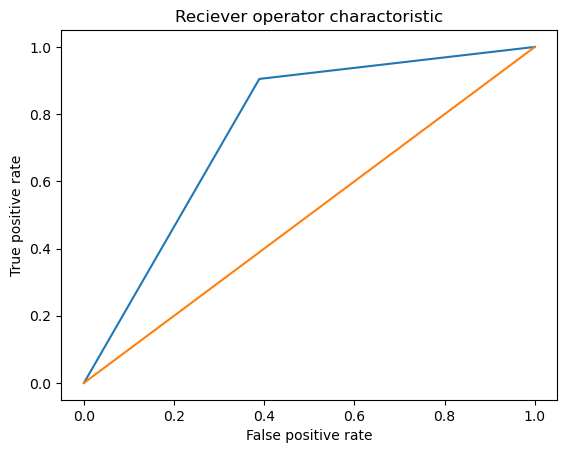

0.7579365079365079


In [789]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

Here we can see that area under the curve is 76% for Support vector classifier model.

# Model-II( Hypertunning Ada boost model from above)

Ada boost model also looks good model as it is giving train accuracy-85% with test accuracy-77% and cross validation score of 75% so lets try to hypertune this model to get more variety of accurate models.

In [816]:
from sklearn.model_selection import GridSearchCV

In [817]:
param_grid={'algorithm':['SAMME', 'SAMME.R'],'random_state':[100,200,300,400,500],'learning_rate':[1,1.01,1.02,1.03,1.04],'n_estimators':[3,50,70,100,200,300]}

In [818]:
ab.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [819]:
gs=GridSearchCV(AdaBoostClassifier(),param_grid,cv=5)

In [820]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 1.01, 1.02, 1.03, 1.04],
                         'n_estimators': [3, 50, 70, 100, 200, 300],
                         'random_state': [100, 200, 300, 400, 500]})

In [821]:
gs.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1,
 'n_estimators': 300,
 'random_state': 100}

In [839]:
final_model=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=300,random_state= 100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [840]:
accuracy_score(y_test,pred)

0.811965811965812

So for Ada boost classifier model accuracy is increased to 81.2%

# Saving model-II

In [841]:
import joblib
joblib.dump(final_model,'Loan Application-2')

['Loan Application-2']

In [842]:
model=joblib.load('Loan Application-2')

In [843]:
#Lets predict with our model-

In [844]:
prediction=model.predict(x_test)
prediction

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [845]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
229,1,1
230,0,0
231,0,0
232,1,1


# Plotting AUC & ROC curve-

In [846]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

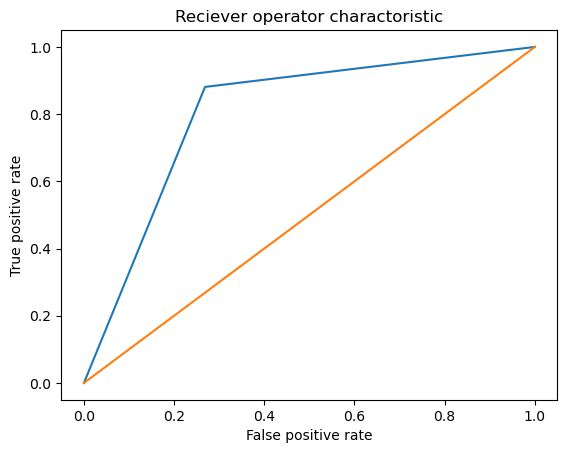

0.806216931216931


In [847]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

So for Adaboost model the area under the curve is 80.6%

# Model-III(Mannual selection of features on the basis of correlation with target variable)

In [848]:
#Importing the data frame from the above after removal of outliers & skewness with encoding of object data.

In [916]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.17554,0.411733,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.17554,0.411733,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.17554,0.411733,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.17554,0.411733,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.17554,0.411733,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.379921,0.831258,-0.379235,0.17554,0.411733,0,1
609,0,0,0,0,0,-0.554885,-1.102837,-1.205100,0.17554,0.411733,0,1
611,1,1,1,0,0,1.023487,0.208603,1.372409,0.17554,0.411733,2,1
612,1,1,2,0,0,0.931750,-1.102837,0.738924,0.17554,0.411733,2,1


# Correlation of features with target variable-

In [917]:
df.corr()['Loan_Status'].sort_values()

Education           -0.087751
Loan_Amount_Term    -0.058151
LoanAmount          -0.023465
Self_Employed       -0.016974
ApplicantIncome      0.006803
Dependents           0.016080
Gender               0.030761
Property_Area        0.036426
CoapplicantIncome    0.073160
Married              0.096703
Credit_History       0.554557
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

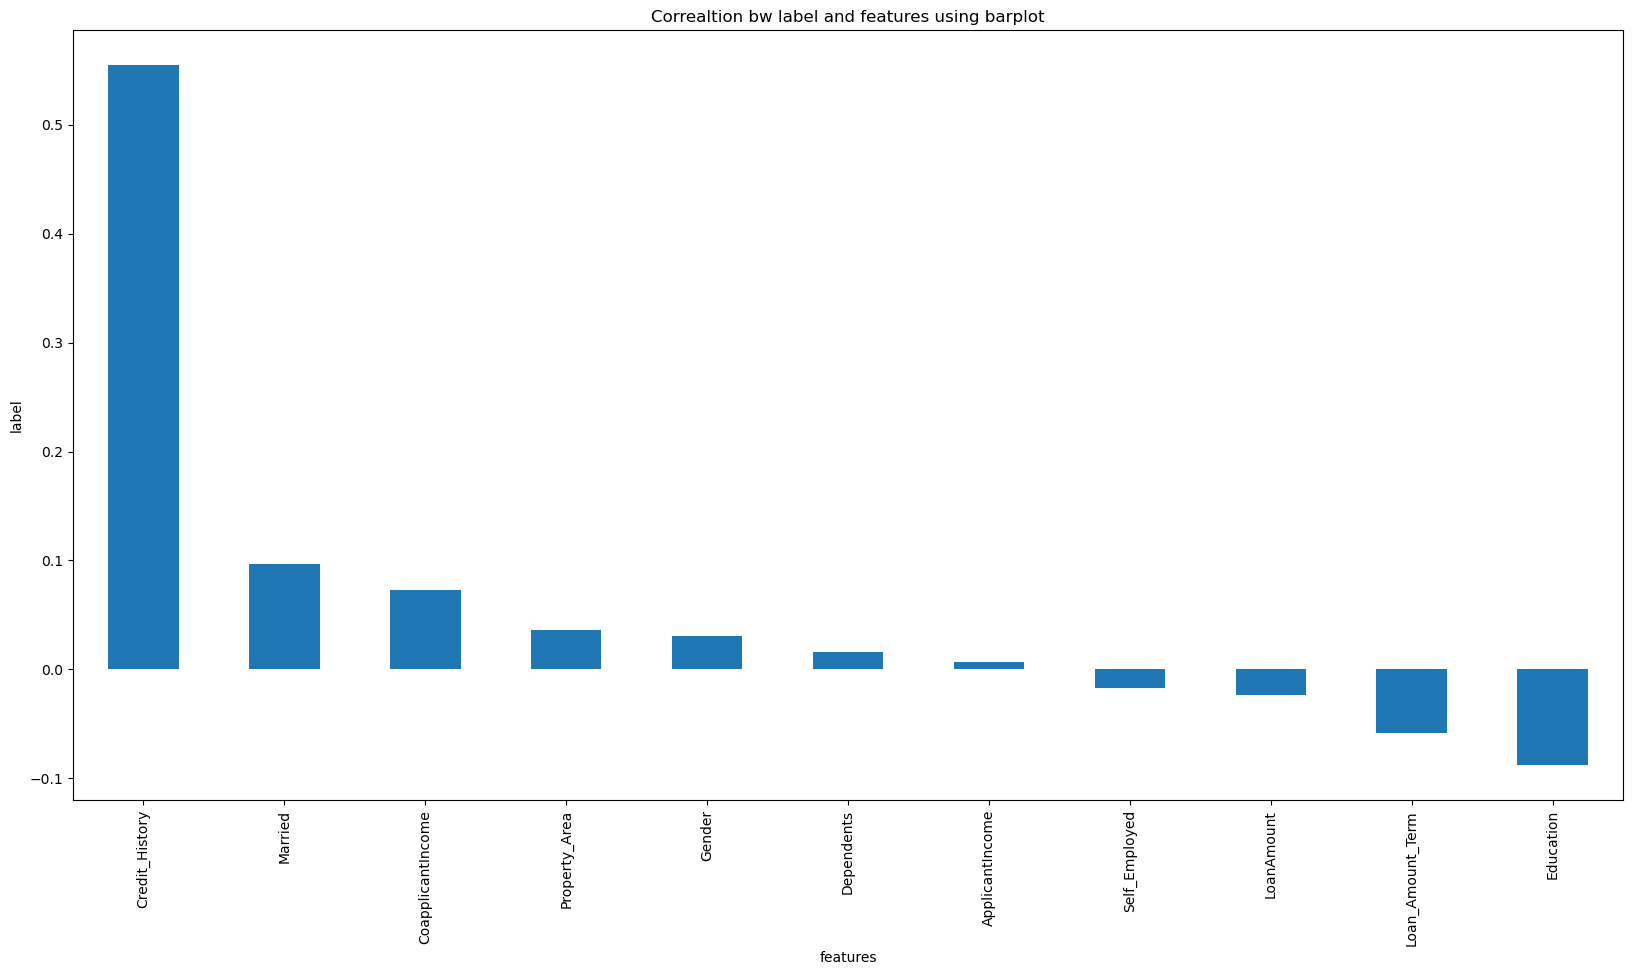

In [919]:
plt.figure(figsize=(20,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Observations-

1. Applicantincome, self_employed, dependents, loanamount,gender,property area has very less correlationship with target variable so we will drop these columns and make the model with the remaining features.

In [920]:
df=df.drop(columns=['ApplicantIncome','LoanAmount','Self_Employed','Dependents','Gender','Property_Area'])
df

,Married,Education,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status
0,0,0,-1.102837,0.17554,0.411733,1
1,1,0,0.750578,0.17554,0.411733,0
2,1,0,-1.102837,0.17554,0.411733,1
3,1,1,0.891686,0.17554,0.411733,1
4,0,0,-1.102837,0.17554,0.411733,1
...,...,...,...,...,...,...
608,1,0,0.831258,0.17554,0.411733,1
609,0,0,-1.102837,0.17554,0.411733,1
611,1,0,0.208603,0.17554,0.411733,1
612,1,0,-1.102837,0.17554,0.411733,1


# Separating Features & Labels-

In [921]:
x=df.drop('Loan_Status',axis=1)  
y=df['Loan_Status']

# Feature scaling-

In [922]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Married,Education,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,-1.347561,-0.543318,-1.130586,0.165251,0.417461
1,0.742081,-0.543318,0.742130,0.165251,0.417461
2,0.742081,-0.543318,-1.130586,0.165251,0.417461
3,0.742081,1.840543,0.884708,0.165251,0.417461
4,-1.347561,-0.543318,-1.130586,0.165251,0.417461
...,...,...,...,...,...
561,0.742081,-0.543318,0.823651,0.165251,0.417461
562,-1.347561,-0.543318,-1.130586,0.165251,0.417461
563,0.742081,-0.543318,0.194511,0.165251,0.417461
564,0.742081,-0.543318,-1.130586,0.165251,0.417461


# Checking VIF for multicollinearity among features-

In [923]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.129756,Married
1,1.009640,Education
2,1.118005,CoapplicantIncome
3,1.015749,Loan_Amount_Term
4,1.006400,Credit_History


Here we can see that VIF score is under acceptable range so we can say there is no multicollinearity among features-

# Resolving class imbalance with Oversampling method-

In [924]:
y.value_counts()

1    389
0    177
Name: Loan_Status, dtype: int64

Here we can see that classes are not balanced so we will use oversampling SMOTE method for balancing classes.

In [926]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [927]:
y.value_counts()

1    389
0    389
Name: Loan_Status, dtype: int64

# Model Building-III

In [928]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,accuracy_score

In [929]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)   

Best accuracy is 0.811965811965812 at random state 37


Here we are getting best accuracy of 81% at random state-37 so we will split the data further on random state-151.

In [936]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [937]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [938]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('=====================Test Result=====================') 
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Confusion matrix\n', confusion_matrix(y_test,pred))
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [939]:
#RandomForest-

In [940]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [941]:
metric_score(rf,x_train,x_test,y_train,y_test, train=True)
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 87.68%
=====================Test Result=====================
accuracy_score:81.20%


 Confusion matrix
 [[92 28]
 [16 98]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       120
           1       0.78      0.86      0.82       114

    accuracy                           0.81       234
   macro avg       0.81      0.81      0.81       234
weighted avg       0.82      0.81      0.81       234



for Random forest classifier we got train accuracy-88% & test accuracy-81% and F1 Score-81% which seems like an generalised model as there is less difference bw train & test accuracy.

In [942]:
#Cross validation score-

In [943]:
score=cross_val_score(rf,x,y)
print(score)
print(score.mean())

[0.67948718 0.71153846 0.75       0.79354839 0.75483871]
0.7378825475599669


The cross validation score for random forest model is 74%.

In [944]:
#LogisticRegression-

In [945]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [946]:
metric_score(lr,x_train,x_test,y_train,y_test, train=True)
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 72.24%
=====================Test Result=====================
accuracy_score:79.06%


 Confusion matrix
 [[ 75  45]
 [  4 110]]


 Test classification report
               precision    recall  f1-score   support

           0       0.95      0.62      0.75       120
           1       0.71      0.96      0.82       114

    accuracy                           0.79       234
   macro avg       0.83      0.79      0.79       234
weighted avg       0.83      0.79      0.78       234



for Logistic regression model we got train accuracy-72% & test accuracy-79% and F1 Score-79% which seems like an underfitted model as we are getting high bias & high variance.

In [947]:
#Cross validation score-

In [948]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())

[0.70512821 0.71794872 0.78205128 0.79354839 0.69677419]
0.7390901571546733


The cross validation score for Logistic regression is 74%

In [949]:
#SupportVectorMachineClassifier-

In [950]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [951]:
metric_score(sv,x_train,x_test,y_train,y_test, train=True)
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 73.35%
=====================Test Result=====================
accuracy_score:79.49%


 Confusion matrix
 [[ 82  38]
 [ 10 104]]


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       120
           1       0.73      0.91      0.81       114

    accuracy                           0.79       234
   macro avg       0.81      0.80      0.79       234
weighted avg       0.81      0.79      0.79       234



for Support vector classifier we got train accuracy-73% & test accuracy-79% and F1 Score-79% which seems like a Underfitted model.

In [952]:
#Cross validation score-

In [953]:
score=cross_val_score(sv,x,y)
print(score)
print(score.mean())

[0.69230769 0.70512821 0.78205128 0.78709677 0.73548387]
0.7404135649296939


The cross validation score for support vector classifier is 74%.

In [954]:
#GradientBoostingClassifier-

In [1010]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [1011]:
metric_score(gb,x_train,x_test,y_train,y_test, train=True)
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 80.15%
=====================Test Result=====================
accuracy_score:78.21%


 Confusion matrix
 [[ 80  40]
 [ 11 103]]


 Test classification report
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       120
           1       0.72      0.90      0.80       114

    accuracy                           0.78       234
   macro avg       0.80      0.79      0.78       234
weighted avg       0.80      0.78      0.78       234



for Gradient boosting classifier we got train accuracy-80% & test accuracy-78% and F1 Score-78% which seems like an generalised model.

In [1012]:
#Cross validation score-

In [1018]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())

[0.68589744 0.73076923 0.76282051 0.76774194 0.72903226]
0.7352522746071133


The cross validation score for Gradient boosting classifier is 74%.

In [959]:
#AdaBoostClassifier-

In [1003]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [1007]:
metric_score(ab,x_train,x_test,y_train,y_test, train=True)
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 75.18%
=====================Test Result=====================
accuracy_score:75.64%


 Confusion matrix
 [[ 74  46]
 [ 11 103]]


 Test classification report
               precision    recall  f1-score   support

           0       0.87      0.62      0.72       120
           1       0.69      0.90      0.78       114

    accuracy                           0.76       234
   macro avg       0.78      0.76      0.75       234
weighted avg       0.78      0.76      0.75       234



for Ada boost classifier we got train accuracy-75% & test accuracy-76% and F1 Score-76%.

In [962]:
#Cross validation score-

In [963]:
score=cross_val_score(ab,x,y)
print(score)
print(score.mean())

[0.6474359  0.71153846 0.76923077 0.76129032 0.67741935]
0.7133829611248965


The cross validation score for Adaboost claasifier is 71%.

In [964]:
#BaggingClassifier-

In [985]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [986]:
metric_score(bc,x_train,x_test,y_train,y_test, train=True)
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 86.40%
=====================Test Result=====================
accuracy_score:79.06%


 Confusion matrix
 [[93 27]
 [22 92]]


 Test classification report
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       120
           1       0.77      0.81      0.79       114

    accuracy                           0.79       234
   macro avg       0.79      0.79      0.79       234
weighted avg       0.79      0.79      0.79       234



For Bagging classifier we got train accuracy-86% & test accuracy-79% and F1 Score-79% 

In [967]:
#Cross validation score-

In [1000]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.69230769 0.72435897 0.73717949 0.8        0.7483871 ]
0.7404466501240695


The cross validation score for bagging classifier is 74%

In [969]:
#ExtraTreeClassifier-

In [970]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [971]:
metric_score(et,x_train,x_test,y_train,y_test, train=True)
metric_score(et,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 87.68%
=====================Test Result=====================
accuracy_score:80.77%


 Confusion matrix
 [[92 28]
 [17 97]]


 Test classification report
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       120
           1       0.78      0.85      0.81       114

    accuracy                           0.81       234
   macro avg       0.81      0.81      0.81       234
weighted avg       0.81      0.81      0.81       234



for Extra tree classifier we got train accuracy-88% & test accuracy-81% and F1 Score-81%.

In [972]:
#Cross validation score-

In [973]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())

[0.70512821 0.72435897 0.73076923 0.78709677 0.74193548]
0.7378577336641852


The cross validation score for Extra tree classifier is 74%.

In [974]:
#DecisionTreeclassifier-

In [975]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [976]:
metric_score(dt,x_train,x_test,y_train,y_test, train=True)
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 87.68%
=====================Test Result=====================
accuracy_score:78.21%


 Confusion matrix
 [[87 33]
 [18 96]]


 Test classification report
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       120
           1       0.74      0.84      0.79       114

    accuracy                           0.78       234
   macro avg       0.79      0.78      0.78       234
weighted avg       0.79      0.78      0.78       234



for Decision Tree classifier we got train accuracy-88% & test accuracy-78% and F1 Score-78% which seems like an overfitted model.

In [977]:
#Cross validation score-

In [978]:
score=cross_val_score(dt,x,y)
print(score)
print(score.mean())

[0.69230769 0.69871795 0.71153846 0.76129032 0.72903226]
0.7185773366418527


The cross validation score for Decision tree classifier is 72%.

Here as per the above performance of all the model i will recommend Gradient boosting classifier as my best model as i am getting train accuracy-80% & test accuracy and F1 score=78% with cross validation score of 74%. so this model looks very much generalised as there is very less gap bw F1 score & test accuracy as this is a class imbalance problem.

# Hyper parameter tunning-

In [1019]:
from sklearn.model_selection import GridSearchCV

In [1036]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss':['deviance', 'exponential'],'random_state':[10,20,40],'max_depth':[5,7,9,11,13],
            'n_estimators':[300,500,1000,800],'min_samples_leaf':[4,5,7,9]}

In [1037]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1038]:
gs=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [1039]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [5, 7, 9, 11, 13],
                         'min_samples_leaf': [4, 5, 7, 9],
                         'n_estimators': [300, 500, 1000, 800],
                         'random_state': [10, 20, 40]})

In [1040]:
gs.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_depth': 5,
 'min_samples_leaf': 7,
 'n_estimators': 300,
 'random_state': 10}

In [1049]:
final_model=GradientBoostingClassifier(criterion='friedman_mse',max_depth=5,loss='deviance',n_estimators=300,min_samples_leaf=7,random_state=10)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [1050]:
accuracy_score(y_test,pred)

0.7735042735042735

Here we can see that accuracy of gradient boosting classifier is still 78% even after applying Hyper parameter tunning method.

# Saving model-

In [1051]:
import joblib
joblib.dump(final_model,'Loan Applications-3')

['Loan Applications-3']

In [1052]:
model=joblib.load('Loan Applications-3')

In [1053]:
prediction=model.predict(x_test)
prediction

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [1054]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0,0
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
229,1,1
230,1,1
231,1,0
232,0,1


# Plotting AUC & ROC curve-

In [1055]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

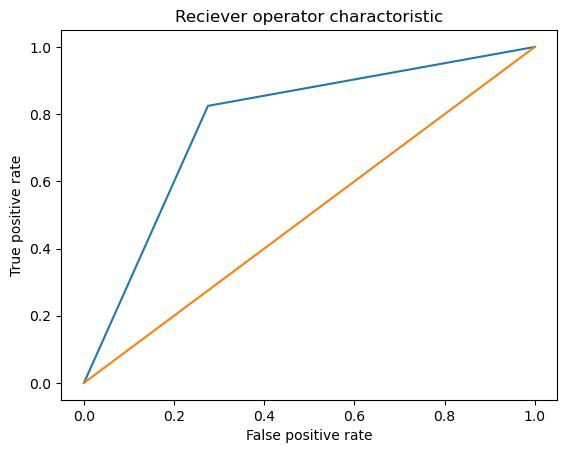

0.774780701754386


In [1056]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

Here we can see that the area under the curve is 77.4% for our model-III.

# Model-IV(Feature selection with Select-K best method-)

In [1128]:
#Importing the data frame from the above after removing skewness nan values and outliers and with encoding of object data.

In [1129]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.17554,0.411733,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.17554,0.411733,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.17554,0.411733,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.17554,0.411733,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.17554,0.411733,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.379921,0.831258,-0.379235,0.17554,0.411733,0,1
609,0,0,0,0,0,-0.554885,-1.102837,-1.205100,0.17554,0.411733,0,1
611,1,1,1,0,0,1.023487,0.208603,1.372409,0.17554,0.411733,2,1
612,1,1,2,0,0,0.931750,-1.102837,0.738924,0.17554,0.411733,2,1


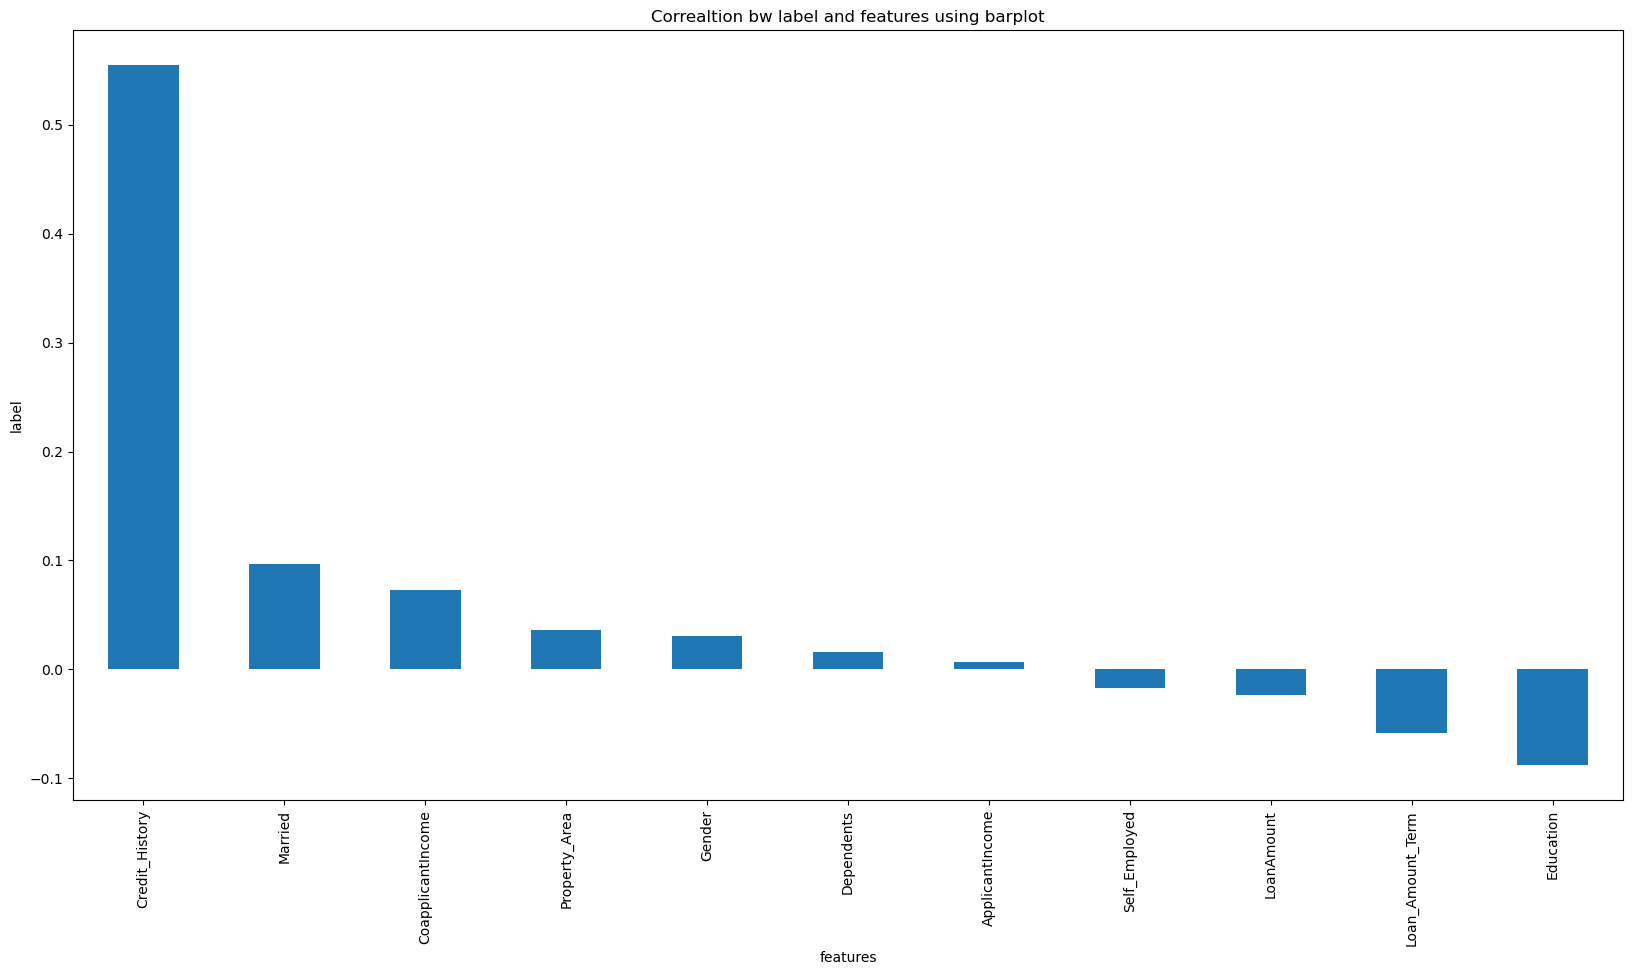

In [1131]:
plt.figure(figsize=(20,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Feature selection through select k-best method-

In [1134]:
x=df.drop(columns=['Loan_Status'],axis=1)
y=df.Loan_Status

In [1135]:
from sklearn.feature_selection import SelectKBest,f_classif

In [1138]:
best_features=SelectKBest(score_func=f_classif,k=10) 

fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)   
df_columns=pd.DataFrame(x.columns) 



feature_score= pd.concat([df_scores,df_columns],axis=1)
feature_score.columns=['score','feature_name']  

print(feature_score.nlargest(5,'score'))

        score       feature_name
9  250.480269     Credit_History
1    5.324029            Married
3    4.376635          Education
6    3.034951  CoapplicantIncome
8    1.913654   Loan_Amount_Term


In [ ]:
#lets just saperate these 15 features in a new variable.

In [1140]:
new_df=df[['Credit_History','Married','Education','CoapplicantIncome','Loan_Amount_Term','Loan_Status']]
new_df

,Credit_History,Married,Education,CoapplicantIncome,Loan_Amount_Term,Loan_Status
0,0.411733,0,0,-1.102837,0.17554,1
1,0.411733,1,0,0.750578,0.17554,0
2,0.411733,1,0,-1.102837,0.17554,1
3,0.411733,1,1,0.891686,0.17554,1
4,0.411733,0,0,-1.102837,0.17554,1
...,...,...,...,...,...,...
608,0.411733,1,0,0.831258,0.17554,1
609,0.411733,0,0,-1.102837,0.17554,1
611,0.411733,1,0,0.208603,0.17554,1
612,0.411733,1,0,-1.102837,0.17554,1


In [1141]:
#Separating features and label from the data frame-

In [1142]:
x=new_df.drop(columns=['Loan_Status'],axis=1)
y=new_df.Loan_Status

In [1143]:
df=new_df
df

,Credit_History,Married,Education,CoapplicantIncome,Loan_Amount_Term,Loan_Status
0,0.411733,0,0,-1.102837,0.17554,1
1,0.411733,1,0,0.750578,0.17554,0
2,0.411733,1,0,-1.102837,0.17554,1
3,0.411733,1,1,0.891686,0.17554,1
4,0.411733,0,0,-1.102837,0.17554,1
...,...,...,...,...,...,...
608,0.411733,1,0,0.831258,0.17554,1
609,0.411733,0,0,-1.102837,0.17554,1
611,0.411733,1,0,0.208603,0.17554,1
612,0.411733,1,0,-1.102837,0.17554,1


# Feature scaling-

In [1144]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Credit_History,Married,Education,CoapplicantIncome,Loan_Amount_Term
0,0.417461,-1.347561,-0.543318,-1.130586,0.165251
1,0.417461,0.742081,-0.543318,0.742130,0.165251
2,0.417461,0.742081,-0.543318,-1.130586,0.165251
3,0.417461,0.742081,1.840543,0.884708,0.165251
4,0.417461,-1.347561,-0.543318,-1.130586,0.165251
...,...,...,...,...,...
561,0.417461,0.742081,-0.543318,0.823651,0.165251
562,0.417461,-1.347561,-0.543318,-1.130586,0.165251
563,0.417461,0.742081,-0.543318,0.194511,0.165251
564,0.417461,0.742081,-0.543318,-1.130586,0.165251


# Checking for multicollinearity-

In [1145]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.006400,Credit_History
1,1.129756,Married
2,1.009640,Education
3,1.118005,CoapplicantIncome
4,1.015749,Loan_Amount_Term


Here we can see that the multicollinearity under acceptable range so we can move further for model building-

# Oversampling-

In [1146]:
y.value_counts()

1    389
0    177
Name: Loan_Status, dtype: int64

Here we can see that there is class imbalance so we will use smote for oversampling of classes.

In [1148]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [1149]:
y.value_counts()

1    389
0    389
Name: Loan_Status, dtype: int64

Here the class imbalance problem has been resolved now.

# Model building-

In [1150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)               

Best accuracy is 0.7692307692307693 at random state 60


Here we got our best accuracy at random state-60 so we will split data on this random state further.

In [1152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [1153]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('=====================Test Result=====================') 
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Confusion matrix\n', confusion_matrix(y_test,pred))
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [1154]:
#Random forest-

In [1155]:
rf=RandomForestClassifier() 

rf.fit(x_train,y_train)

RandomForestClassifier()

In [1156]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) 
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 86.21%
=====================Test Result=====================
accuracy_score:67.52%


 Confusion matrix
 [[68 41]
 [35 90]]


 Test classification report
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       109
           1       0.69      0.72      0.70       125

    accuracy                           0.68       234
   macro avg       0.67      0.67      0.67       234
weighted avg       0.67      0.68      0.67       234



for random forest classifier we got train accuracy-86% & test accuracy-68% and F1 Score-68% which seems like an overfitted model.

In [1157]:
#Cross validation score-

In [1158]:
score=cross_val_score(rf,x,y)
print(score)
print(score.mean())

[0.67948718 0.69230769 0.60897436 0.72258065 0.67096774]
0.674863523573201


The cross validation score for random forest is 67%

In [1159]:
#Logistic regression-

In [1160]:
lr=LogisticRegression() 
lr.fit(x_train,y_train)

LogisticRegression()

In [1161]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) 
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 69.12%
=====================Test Result=====================
accuracy_score:76.92%


 Confusion matrix
 [[ 57  52]
 [  2 123]]


 Test classification report
               precision    recall  f1-score   support

           0       0.97      0.52      0.68       109
           1       0.70      0.98      0.82       125

    accuracy                           0.77       234
   macro avg       0.83      0.75      0.75       234
weighted avg       0.83      0.77      0.75       234



for Logistic Regression we got train accuracy-69% & test accuracy-77% and F1 Score-77% which seems like an underfitted model as train & test accuracy is low and having high bias & high variance.

In [1162]:
#Cross validation score-

In [1163]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())

[0.70512821 0.71794872 0.67948718 0.74193548 0.63225806]
0.6953515301902399


The cross validation score for logistic regression is 69%

In [1165]:
#Support vector classifier-

In [1166]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [1167]:
metric_score(sv,x_train,x_test,y_train,y_test,train=True) 
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 70.40%
=====================Test Result=====================
accuracy_score:72.22%


 Confusion matrix
 [[ 59  50]
 [ 15 110]]


 Test classification report
               precision    recall  f1-score   support

           0       0.80      0.54      0.64       109
           1       0.69      0.88      0.77       125

    accuracy                           0.72       234
   macro avg       0.74      0.71      0.71       234
weighted avg       0.74      0.72      0.71       234



for Support vector classifier we got train accuracy-70% & test accuracy-72% and F1 Score-72%.

In [1168]:
#Cross validation score-

In [1169]:
score=cross_val_score(sv,x,y)
print(score)
print(score.mean())

[0.69230769 0.71153846 0.75641026 0.72258065 0.63870968]
0.7043093465674111


The cross validation score for svc model is 70%.

In [1170]:
#GradientBoostingClassifier-

In [1171]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [1172]:
metric_score(gb,x_train,x_test,y_train,y_test,train=True) 
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 79.41%
=====================Test Result=====================
accuracy_score:73.93%


 Confusion matrix
 [[ 66  43]
 [ 18 107]]


 Test classification report
               precision    recall  f1-score   support

           0       0.79      0.61      0.68       109
           1       0.71      0.86      0.78       125

    accuracy                           0.74       234
   macro avg       0.75      0.73      0.73       234
weighted avg       0.75      0.74      0.73       234



for Gradient boosting classifier we got train accuracy-79% & test accuracy-74% and F1 Score-74% which looks like generalised model.

In [1173]:
#Cross validation score-

In [1174]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())

[0.69871795 0.71794872 0.73717949 0.70967742 0.61935484]
0.6965756823821339


The cross validation score for Gradient boosting classifier is 70%.

In [1175]:
#AdaBoostClassifier-

In [1176]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [1177]:
metric_score(ab,x_train,x_test,y_train,y_test,train=True) 
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 72.98%
=====================Test Result=====================
accuracy_score:72.22%


 Confusion matrix
 [[71 38]
 [27 98]]


 Test classification report
               precision    recall  f1-score   support

           0       0.72      0.65      0.69       109
           1       0.72      0.78      0.75       125

    accuracy                           0.72       234
   macro avg       0.72      0.72      0.72       234
weighted avg       0.72      0.72      0.72       234



for Ada boost classifier we got train accuracy-73% & test accuracy-72% and F1 Score-72%.

In [1178]:
#Cross validation score-

In [1179]:
score=cross_val_score(ab,x,y)
print(score)
print(score.mean())

[0.68589744 0.73076923 0.75641026 0.72903226 0.61935484]
0.7042928039702232


Cross validation score for ada boost model is 70.4%.

In [1180]:
#BaggingClassifier-

In [1181]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [1182]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True) 
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 85.48%
=====================Test Result=====================
accuracy_score:64.53%


 Confusion matrix
 [[67 42]
 [41 84]]


 Test classification report
               precision    recall  f1-score   support

           0       0.62      0.61      0.62       109
           1       0.67      0.67      0.67       125

    accuracy                           0.65       234
   macro avg       0.64      0.64      0.64       234
weighted avg       0.65      0.65      0.65       234



for Bagging classifier we got train accuracy-85% & test accuracy-64% and F1 Score-64% which looks like overfitted model.

In [1183]:
#Cross validation score-

In [1184]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.67948718 0.66025641 0.57692308 0.70967742 0.63870968]
0.6530107526881721


The cross validation score for bagging classifier is 65%

In [1185]:
#ExtraTreeClassifier-

In [1186]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [1187]:
metric_score(et,x_train,x_test,y_train,y_test,train=True) 
metric_score(et,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 86.21%
=====================Test Result=====================
accuracy_score:67.09%


 Confusion matrix
 [[70 39]
 [38 87]]


 Test classification report
               precision    recall  f1-score   support

           0       0.65      0.64      0.65       109
           1       0.69      0.70      0.69       125

    accuracy                           0.67       234
   macro avg       0.67      0.67      0.67       234
weighted avg       0.67      0.67      0.67       234



for Extra tree classifier we got train accuracy-86% & test accuracy-67% and F1 Score-67% which seems like an overfitted model.

In [1188]:
#Cross validation score-

In [1189]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())

[0.66666667 0.69871795 0.6025641  0.71612903 0.66451613]
0.6697187758478081


The cross validation score for Extra tree classifier is 67%

In [1190]:
#Decision tree classifier-

In [1191]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [1192]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True) 
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 86.21%
=====================Test Result=====================
accuracy_score:65.81%


 Confusion matrix
 [[70 39]
 [41 84]]


 Test classification report
               precision    recall  f1-score   support

           0       0.63      0.64      0.64       109
           1       0.68      0.67      0.68       125

    accuracy                           0.66       234
   macro avg       0.66      0.66      0.66       234
weighted avg       0.66      0.66      0.66       234



For decision tree classifier train accuracy is 86% and test accuracy is 65% and F1 score is 65% which looks like a overfitted model

In [1193]:
#Cross validation score-

In [1194]:
score=cross_val_score(dt,x,y)
print(score)
print(score.mean())

[0.66666667 0.67307692 0.57051282 0.70322581 0.65806452]
0.6543093465674111


The cross validation score for Decision tree classifier model is 65%.

from the above performances of all the models we can say Ada boost model looks like the best model as it is giving us Train accuracy-73% & test accuracy and F1 Score-72% with cross validation score of 70.4% which looks like a generalised model. as it is a class imbalance problem there must be least difference bw model's test accuracy & its F1 score.

# Hyper parameter tunning-

In [1199]:
from sklearn.model_selection import GridSearchCV

In [1202]:
param_grid={'algorithm':['SAMME', 'SAMME.R'],'random_state':[100,500,1000,1500],'learning_rate':[0.7,0.9,1,1.02],
            'n_estimators':[200,500,800,1000,1300,1500]}

In [1203]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1204]:
gs=GridSearchCV(AdaBoostClassifier(),param_grid,cv=5)

In [1205]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.7, 0.9, 1, 1.02],
                         'n_estimators': [200, 500, 800, 1000, 1300, 1500],
                         'random_state': [100, 500, 1000, 1500]})

In [1206]:
gs.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1,
 'n_estimators': 200,
 'random_state': 100}

In [1214]:
final_model=AdaBoostClassifier(algorithm= 'SAMME',learning_rate= 1,n_estimators=200,random_state=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [1215]:
accuracy_score(y_test,pred)

0.7307692307692307

Here we can see that accuracy of gradient boosting classifier increased to 73% with the help of hyperparameter tunning.

# Saving model-

In [1216]:
import joblib
joblib.dump(final_model,'Loan Applications-4')

['Loan Applications-4']

In [1217]:
model=joblib.load('Loan Applications-4')

In [1218]:
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [1219]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
229,0,0
230,1,1
231,0,1
232,0,0


# Plotting AUC & ROC curve-

In [1220]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

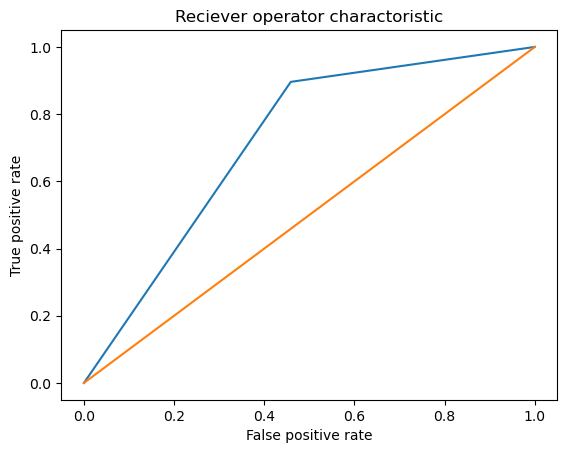

0.7186422018348624


In [1221]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

Here we can see that the area under the curve is 72% for our model-IV 

# Model-V(With Applying Principle Component Analysis)

In [1292]:
#Importing the data frame from the above after removal of outliers & skewness with encoding of object data.

In [1293]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.17554,0.411733,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.17554,0.411733,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.17554,0.411733,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.17554,0.411733,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.17554,0.411733,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.379921,0.831258,-0.379235,0.17554,0.411733,0,1
609,0,0,0,0,0,-0.554885,-1.102837,-1.205100,0.17554,0.411733,0,1
611,1,1,1,0,0,1.023487,0.208603,1.372409,0.17554,0.411733,2,1
612,1,1,2,0,0,0.931750,-1.102837,0.738924,0.17554,0.411733,2,1


In [1294]:
#Lets plot the relationship bw features and label-

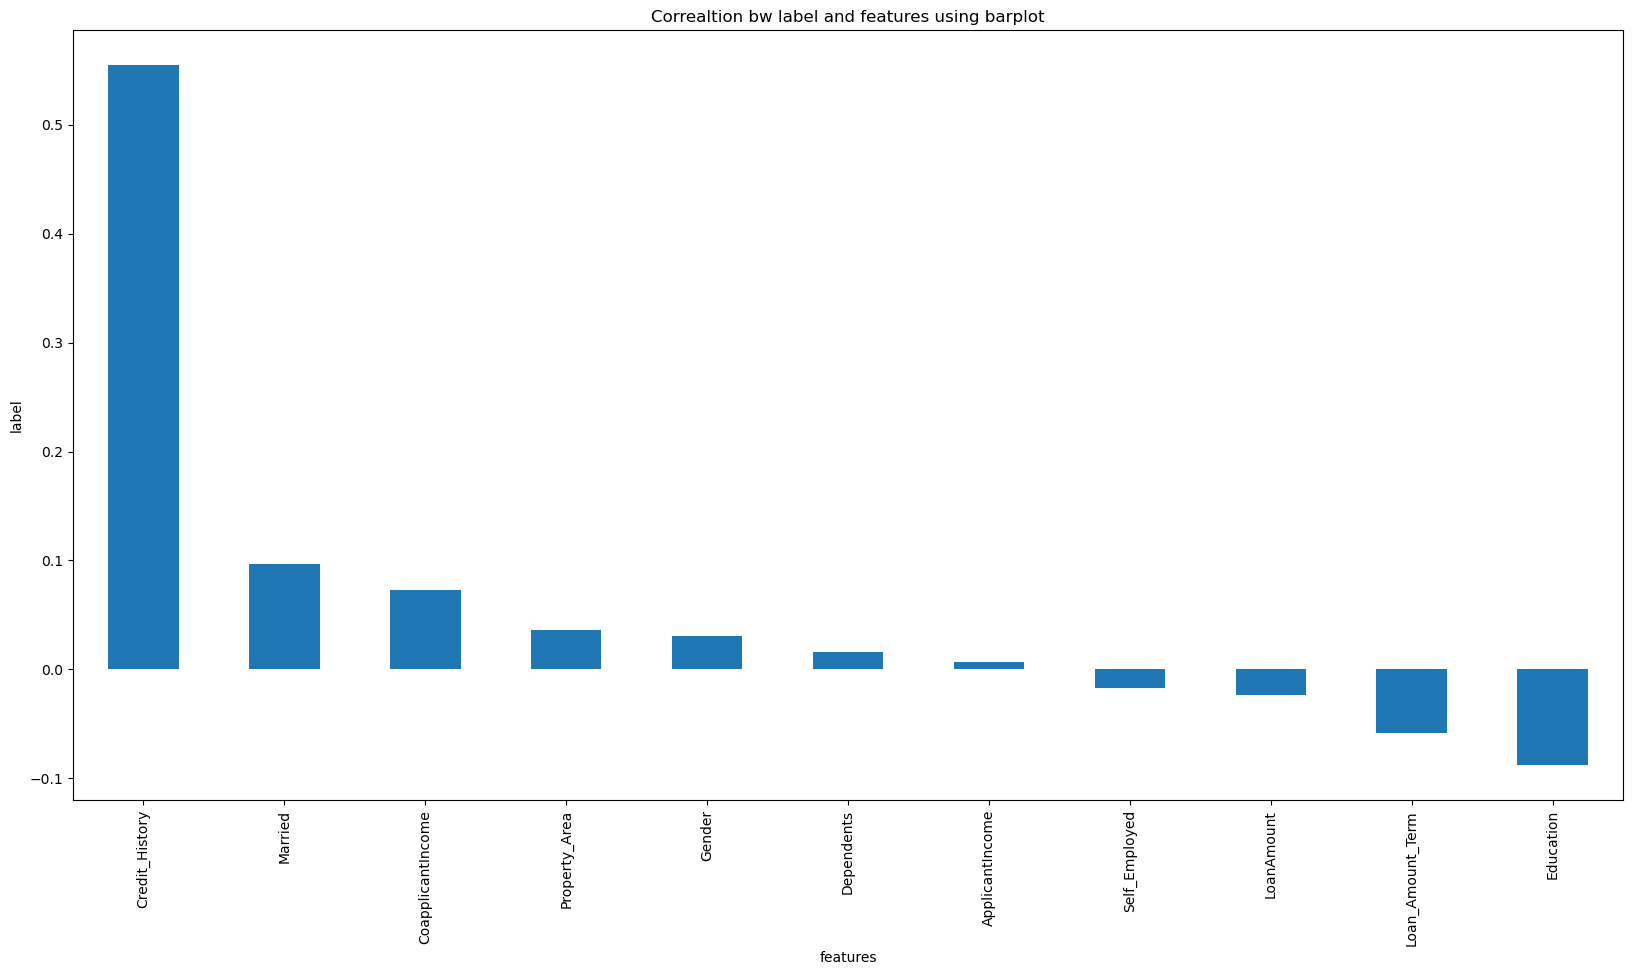

In [1295]:
plt.figure(figsize=(20,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

In [1296]:
#Separating features and label-

In [1298]:
x=df.drop(columns=['Loan_Status'],axis=1)
y=df.Loan_Status

# Feature scaling-

In [1299]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.468858,-1.347561,-0.725020,-0.543318,-0.381771,0.753942,-1.130586,0.344626,0.165251,0.417461,1.219521
1,0.468858,0.742081,0.275861,-0.543318,-0.381771,0.267723,0.742130,-0.015954,0.165251,0.417461,-1.327523
2,0.468858,0.742081,-0.725020,-0.543318,2.619372,-0.606020,-1.130586,-1.744133,0.165251,0.417461,1.219521
3,0.468858,0.742081,-0.725020,1.840543,-0.381771,-0.923672,0.884708,-0.187930,0.165251,0.417461,1.219521
4,0.468858,-1.347561,-0.725020,-0.543318,-0.381771,0.804061,-1.130586,0.243235,0.165251,0.417461,1.219521
...,...,...,...,...,...,...,...,...,...,...,...
561,0.468858,0.742081,-0.725020,-0.543318,-0.381771,-0.449701,0.823651,-0.467034,0.165251,0.417461,-1.327523
562,-2.132843,-1.347561,-0.725020,-0.543318,-0.381771,-0.677555,-1.130586,-1.557660,0.165251,0.417461,-1.327523
563,0.468858,0.742081,0.275861,-0.543318,-0.381771,1.377941,0.194511,1.846160,0.165251,0.417461,1.219521
564,0.468858,0.742081,1.276743,-0.543318,-0.381771,1.258473,-1.130586,1.009589,0.165251,0.417461,1.219521


# Applying Principle component analysis-

In [1300]:
from sklearn.decomposition import PCA

In [1301]:
pca=PCA()
pca.fit_transform(x)

array([[ 0.86091421,  1.33982683, -0.70547362, ..., -0.60102581,
         0.62159355, -0.22618258],
       [-1.00118455, -0.374124  , -0.6996284 , ..., -0.44197952,
        -0.23822663,  0.44856745],
       [ 0.71240293,  0.3619985 ,  1.07379158, ..., -1.52432129,
        -1.02721052, -0.39287195],
       ...,
       [-1.81435911,  1.14397979, -1.18156077, ...,  0.60902673,
        -0.12172374,  0.02226044],
       [-1.45465989,  1.48443603, -0.18568266, ...,  0.14825042,
        -0.1175198 , -0.23540927],
       [ 2.11725042,  2.25923799,  1.11861362, ...,  0.43609265,
        -0.12331694, -0.35034899]])

In [1302]:
#Lets check how much components required for model building which covers maximun variance-

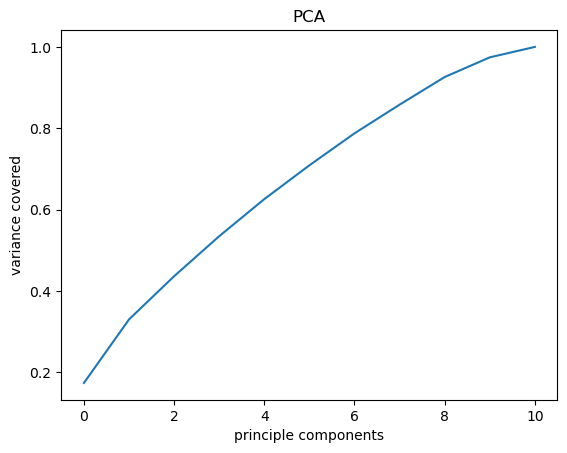

In [1303]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))  #cumulative sum  #this explained ratio will tell the correlation bw feature 
plt.xlabel('principle components') #and label for every component of feature i.e igon values or the distance.
plt.ylabel('variance covered')   
plt.title('PCA')
plt.show()

From this figure we can say that 9 Components will be enough which will cover maximum variance so lets build 9 component from the existing features.

In [1304]:
pca=PCA(n_components=9)
new_components=pca.fit_transform(x)

In [1305]:
princi_comp=pd.DataFrame(new_components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.860914,1.339827,-0.705474,-1.023745,0.223746,0.143213,-0.237015,-1.284137,-0.601026
1,-1.001185,-0.374124,-0.699628,0.752889,-0.704669,0.252747,-0.357569,0.730668,-0.441980
2,0.712403,0.361998,1.073792,-1.594192,-0.030487,-0.030455,2.569392,0.599197,-1.524321
3,-0.165875,-1.940214,0.342283,-0.488340,-0.114449,0.016560,0.742136,-1.689817,0.591879
4,0.893687,1.339950,-0.674470,-1.043369,0.216176,0.163650,-0.239042,-1.270099,-0.644294
...,...,...,...,...,...,...,...,...,...
561,-0.268122,-1.049503,-0.906761,0.688569,-0.920146,-0.210353,-0.081625,0.624853,-0.797824
562,3.099021,0.311035,-0.069826,0.485643,-0.958614,0.406794,-0.640585,1.380360,0.130777
563,-1.814359,1.143980,-1.181561,-0.795947,0.559775,0.075484,-0.165038,-0.979039,0.609027
564,-1.454660,1.484436,-0.185683,-1.193298,0.764067,1.233685,-0.501758,-0.429908,0.148250


Here we have made 9 components from the existing features.

# Oversampling-

In [1307]:
y.value_counts()

1    389
0    177
Name: Loan_Status, dtype: int64

Here we can see the data is not balanced, since it is a classification problem we will balance the data using oversampling method-

In [1308]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
princi_comp,y=sm.fit_resample(x,y)

In [1309]:
y.value_counts()

1    389
0    389
Name: Loan_Status, dtype: int64

Now the data is balanced.now we can build machine learning classification models-

# Model building-

In [1310]:
#Importing libraries-

In [1311]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [1312]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=i) #x&ywe are giving we got after resampling
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)        

Best accuracy is 0.8803418803418803 at random state 191


Here we got 88% accuracy at random state of 191 so we will move forward in model building on the same random state

In [1314]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=.30, random_state=maxrs)

Splitted the data set into train & test on same random state-

In [1315]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [1316]:
#logistic regression-

In [1317]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [1318]:
metric_score(lr,x_train,x_test,y_train,y_test, train=True)
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 71.51%
/n=====================Test Result=====================
accuracy_score: 72.65%
confusion matrix is: 
[[ 67  54]
 [ 10 103]]


 Test classification report
               precision    recall  f1-score   support

           0       0.87      0.55      0.68       121
           1       0.66      0.91      0.76       113

    accuracy                           0.73       234
   macro avg       0.76      0.73      0.72       234
weighted avg       0.77      0.73      0.72       234



For Logistic regression i got train accuracy-72% & test accuracy-73% with F1 score is also 73% which is looking like a underfitted model.

In [1319]:
#Cross validation score-

In [1320]:
score=cross_val_score(lr,princi_comp,y)
print(score)
print(score.mean())

[0.69871795 0.73076923 0.76282051 0.69032258 0.69032258]
0.714590570719603


The cross validation score for logistic regression is 71%.

In [1321]:
#Random forest-

In [1322]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [1323]:
metric_score(rf,x_train,x_test,y_train,y_test, train=True)
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 88.03%
confusion matrix is: 
[[ 99  22]
 [  6 107]]


 Test classification report
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       121
           1       0.83      0.95      0.88       113

    accuracy                           0.88       234
   macro avg       0.89      0.88      0.88       234
weighted avg       0.89      0.88      0.88       234



For Random forest train accuracy-100% & test accuracy is-88% F1 score- 88% which looks like an overfitted model.

In [1324]:
#Cross validation score-

In [1325]:
score=cross_val_score(rf,princi_comp,y)
print(score)
print(score.mean())

[0.76282051 0.76282051 0.87820513 0.84516129 0.87741935]
0.8252853598014888


The cross validation score for random forest is 83%.

In [1326]:
#SupportVectorMachineClassifier-

In [1327]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [1328]:
metric_score(sv,x_train,x_test,y_train,y_test, train=True)
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 78.68%
/n=====================Test Result=====================
accuracy_score: 73.50%
confusion matrix is: 
[[73 48]
 [14 99]]


 Test classification report
               precision    recall  f1-score   support

           0       0.84      0.60      0.70       121
           1       0.67      0.88      0.76       113

    accuracy                           0.74       234
   macro avg       0.76      0.74      0.73       234
weighted avg       0.76      0.74      0.73       234



For support vector classifier train accuracy-79% & test accuracy-74% and F1 score-74%

In [1329]:
#Cross validation score-

In [1330]:
score=cross_val_score(sv,princi_comp,y)
print(score)
print(score.mean())

[0.70512821 0.71153846 0.73076923 0.67096774 0.71612903]
0.7069065343258891


The cross validation score for support vector classifier is 71%. this model looks very much generalised as cross validation score is very much close to F1 score of this model.

In [1382]:
#GradientBoostingClassifier-

In [1391]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [1392]:
metric_score(gb,x_train,x_test,y_train,y_test, train=True)
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 90.99%
/n=====================Test Result=====================
accuracy_score: 82.48%
confusion matrix is: 
[[ 89  32]
 [  9 104]]


 Test classification report
               precision    recall  f1-score   support

           0       0.91      0.74      0.81       121
           1       0.76      0.92      0.84       113

    accuracy                           0.82       234
   macro avg       0.84      0.83      0.82       234
weighted avg       0.84      0.82      0.82       234



For Grdient boosting classifier train accuracy-91% & test accuracy-82% with F1 score-82% looks like a generalised model with low bias & low variance.

In [1334]:
#Cross validation score-

In [1335]:
score=cross_val_score(gb,princi_comp,y)
print(score)
print(score.mean())

[0.68589744 0.69871795 0.85897436 0.83870968 0.82580645]
0.7816211745244004


The cross validation score for Gradient boosting classifier is 78%.

In [1337]:
#AdaBoostClassifier-

In [1338]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [1339]:
metric_score(ab,x_train,x_test,y_train,y_test, train=True)
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 82.54%
/n=====================Test Result=====================
accuracy_score: 81.62%
confusion matrix is: 
[[ 88  33]
 [ 10 103]]


 Test classification report
               precision    recall  f1-score   support

           0       0.90      0.73      0.80       121
           1       0.76      0.91      0.83       113

    accuracy                           0.82       234
   macro avg       0.83      0.82      0.82       234
weighted avg       0.83      0.82      0.82       234



For Ada boost classfier train accuracy-83% & test accuracy-82% with F1 score-82% looks like a generalised model.

In [1340]:
#Cross validation score-

In [1359]:
score=cross_val_score(ab,princi_comp,y)
print(score)
print(score.mean())

[0.67307692 0.71794872 0.79487179 0.77419355 0.76129032]
0.7442762613730355


The cross validation score for ada boost classifier is 74.4%.

In [1342]:
#BaggingClassifier-

In [1343]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [1344]:
metric_score(bc,x_train,x_test,y_train,y_test, train=True)
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 99.08%
/n=====================Test Result=====================
accuracy_score: 83.76%
confusion matrix is: 
[[103  18]
 [ 20  93]]


 Test classification report
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       121
           1       0.84      0.82      0.83       113

    accuracy                           0.84       234
   macro avg       0.84      0.84      0.84       234
weighted avg       0.84      0.84      0.84       234



For bagging classifier train accuracy-99% & test accuracy-84% with F1 score-84% which is looking like overfitted model as training accuracy is almost 100%.

In [1345]:
#Cross validation score-

In [1346]:
score=cross_val_score(bc,princi_comp,y)
print(score)
print(score.mean())

[0.74358974 0.74358974 0.85897436 0.78064516 0.80645161]
0.786650124069479


The cross validation score for bagging classifier is 79%

In [1347]:
#ExtraTreeClassifier-

In [1348]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [1349]:
metric_score(et,x_train,x_test,y_train,y_test, train=True)
metric_score(et,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 87.18%
confusion matrix is: 
[[100  21]
 [  9 104]]


 Test classification report
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       121
           1       0.83      0.92      0.87       113

    accuracy                           0.87       234
   macro avg       0.87      0.87      0.87       234
weighted avg       0.88      0.87      0.87       234



for extra tree classfier train accuracy-100% test accuracy-87% with F1 score-87% which is looking like overfitted model as training accuracy is 100%.

In [1350]:
#Cross validation score-

In [1351]:
score=cross_val_score(et,princi_comp,y)
print(score)
print(score.mean())

[0.80128205 0.78205128 0.87820513 0.85806452 0.87096774]
0.8381141439205955


The cross validation score for extra tree classfier is 84%.

In [1352]:
#Decision Tree Classifier-

In [1353]:
from sklearn.tree import DecisionTreeClassifier

In [1354]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [1355]:
metric_score(dt,x_train,x_test,y_train,y_test, train=True)
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 79.06%
confusion matrix is: 
[[99 22]
 [27 86]]


 Test classification report
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       121
           1       0.80      0.76      0.78       113

    accuracy                           0.79       234
   macro avg       0.79      0.79      0.79       234
weighted avg       0.79      0.79      0.79       234



For decision tree train accuracy-100% test accuracy-79% which is looking like overfitted model as training accuracy is 100%.

In [1356]:
#Cross validation score-

In [1357]:
score=cross_val_score(dt,princi_comp,y)
print(score)
print(score.mean())

[0.71794872 0.68589744 0.83333333 0.78064516 0.81290323]
0.7661455748552524


The cross validation score for decision tree is 77%.

from the above performances of all the models we can say Gradient boosting classifier model looks like the best model as it is giving us Train accuracy-91% & test accuracy and F1 Score-82% with cross validation score of 79% which looks like a generalised model.
as it is a class imbalance problem there must be least difference bw model's test accuracy & its F1 score.

# Hyperparameter tunning-

In [1393]:
from sklearn.model_selection import GridSearchCV

In [1394]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss':['deviance', 'exponential'],'random_state':[10,20,40],'max_depth':[5,7,9,11,13],
            'n_estimators':[200,300,400],'min_samples_leaf':[2,3]}

In [1395]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1396]:
gs=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [1397]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [5, 7, 9, 11, 13],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [200, 300, 400],
                         'random_state': [10, 20, 40]})

In [1398]:
gs.best_params_

{'criterion': 'squared_error',
 'loss': 'exponential',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'n_estimators': 300,
 'random_state': 20}

In [1410]:
final_model=GradientBoostingClassifier(criterion='squared_error',max_depth=11,loss='exponential',n_estimators=300,min_samples_leaf=3,random_state=20)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [1411]:
accuracy_score(y_test,pred)

0.8803418803418803

The accuracy is increased to 88% for Gradient boosting model with the help of Grid search Cv method. 

# Saving model-

In [1412]:
import joblib
joblib.dump(final_model,'Loan Applications-5')

['Loan Applications-5']

In [1413]:
model=joblib.load('Loan Applications-5')

In [1414]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [1415]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
229,1,1
230,0,0
231,1,1
232,1,1


# Plotting AUC & ROC curve-

In [1417]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

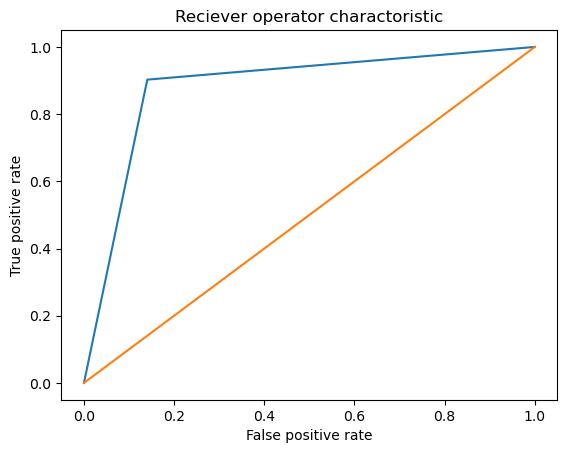

0.8810794997440211


In [1418]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

The area under the curve is 88% with Gradient boosting classifier model which is really a good score. so our model-V has 88% accuracy.

# Conclusion-

Here We have developed V models here:-
    
1.Model-I   - Support Vector classifier with 77% Accuracy.        
2.Model-II  - Ada boost classifier with 81% Accuracy.        
3.Model-III - Grdient boosting classifier with 77% Accuracy.        
4.Model-IV  - Ada boost classifier with 73% Accuracy.       
5.Model-V   - Grdient boosting classifier with 88% Accuracy.